<center>

### COSC2753 - Machine Learning

# **Exploratory Data Analysis (EDA)**

<center>────────────────────────────</center>
&nbsp;


# I. Introduction

**Exploratory Data Analysis (EDA)** is a fundamental initial step in any data analysis project. It involves a series of techniques to investigate and describe the key characteristics of a dataset. EDA leverages various visualization methods to uncover patterns, trends, and relationships between the data's variables.

In this notebook, we will conduct a thorough EDA on our dataset. This process will enhance our understanding of the data and prepare it for subsequent machine learning tasks. To be more specific, we will perform the following steps:

- **Data Loading:** We will begin by importing the dataset we intend to analyze.

- **Data Understanding:** This stage focuses on gaining familiarity with the data. We will explore the structure, identify the variables, and examine their data types.

- **Data Cleaning:** Here, we will address any inconsistencies, missing values, or errors present within the data.

- **Univariate Analysis:** We will delve deeper into each individual variable, analyzing its distribution and statistical properties.

- **Data Assessment:** Finally, we will comprehensively evaluate the data quality and identify any potential issues that might affect our machine learning model.

By the end of this notebook, we will have a better understanding of the dataset and be ready to move on to the next step in the machine learning process.


# II. Exploratory Data Analysis

## 1. Initial Setup

In [1]:
# -*- coding: utf-8 -*-
# Base configuration for all scripts
import sys
import importlib

sys.path.append("../../")

modules_to_reload = ["scripts.leon", "scripts.styler", "scripts.utils"]
[importlib.reload(sys.modules[m]) for m in modules_to_reload if m in sys.modules]

# Import user-defined scripts
from scripts.utils import Utils, BULLET_POINT  # Utils class
from scripts.leon import Leon  # Leon class
from scripts.styler import Styler  # Styler class

print(f"{BULLET_POINT} Importing modules...")

Utils.import_modules(
    [
        ("pandas", "pd"),
        ("numpy", "np"),
        ("tabulate", "tabulate"),
        ("seaborn", "sns"),
    ]
)

leon = Leon()
styler = Styler()

2024-05-18 18:17:52.639672: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 18:17:53.315695: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


>>> Importing modules...
>>> pandas imported as pd
>>> numpy imported as np
>>> tabulate imported as tabulate
>>> seaborn imported as sns

        @|\@@
       -  @@@@                                                            LEON 1.0.0
      /7   @@@@                                         This is Leon, the friendly lion. He is here to help you
     /    @@@@@@                                     Leon is tailored to manipulate images, data and visualizations
     \-' @@@@@@@@`-_______________                                      Made by: Team X
      -@@@@@@@@@             /    \                                     Version: 1.0.3
 _______/    /_       ______/      |__________-
/,__________/  `-.___/,_____________----------_)



## 2. Global Properties

In [ ]:
# Define the path to the zip file
zip_data_path = "../../data/raw/Furniture_Data.zip"

# Configuration
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.precision", 3)

In [ ]:
# Unzip data: Only run this once to extract the data. If the data is already extracted, ignore this line.
df = leon.read_zip(zip_data_path)

In [ ]:
# Define the base directory path
base_dir = "../../data/raw/Furniture_Data/Furniture_Data/"

# Construct the complete directory path
data_dir = os.path.abspath(os.path.join(os.getcwd(), base_dir))

# List all directories in the current directory
folders = [
    folder
    for folder in os.listdir(data_dir)
    if os.path.isdir(os.path.join(data_dir, folder))
]

# Populate the image_dir dictionary with folder names and paths
image_dir = {}
for folder in folders:
    folder_path = os.path.abspath(
        os.path.join(data_dir, folder)
    )  # Get the absolute path of the folder
    image_dir[folder] = folder_path

# Print the dictionary
styler.boxify("Image directories")
for folder, path in image_dir.items():
    print(f"{folder}: {path}")

# Define the path to the beds directory
beds_dir = os.path.join(data_dir, "beds")

# Get all folders in the beds directory
style_folders = [
    folder
    for folder in os.listdir(beds_dir)
    if os.path.isdir(os.path.join(beds_dir, folder))
]

print()

# Print the list of style folders
styler.boxify("All Styles")
print(style_folders)
print()

╭───────────────────╮
│ Image directories │
╰───────────────────╯
lamps: /home/mudoker/workspace/MLGroup/data/raw/Furniture_Data/Furniture_Data/lamps
tables: /home/mudoker/workspace/MLGroup/data/raw/Furniture_Data/Furniture_Data/tables
dressers: /home/mudoker/workspace/MLGroup/data/raw/Furniture_Data/Furniture_Data/dressers
beds: /home/mudoker/workspace/MLGroup/data/raw/Furniture_Data/Furniture_Data/beds
sofas: /home/mudoker/workspace/MLGroup/data/raw/Furniture_Data/Furniture_Data/sofas
chairs: /home/mudoker/workspace/MLGroup/data/raw/Furniture_Data/Furniture_Data/chairs

╭────────────╮
│ All Styles │
╰────────────╯
['Traditional', 'Scandinavian', 'Midcentury', 'Eclectic', 'Craftsman', 'Transitional', 'Modern', 'Mediterranean', 'Tropical', 'Victorian', 'Farmhouse', 'Asian', 'Beach', 'Industrial', 'Contemporary', 'Southwestern', 'Rustic']



## 2. Data Overview

In [ ]:
total_image_count = 0
for folder_path in image_dir.values():
    style_folders = [
        sub_folder
        for sub_folder in os.listdir(folder_path)
        if os.path.isdir(os.path.join(folder_path, sub_folder))
    ]
    for style_folder in style_folders:
        style_folder_path = os.path.join(folder_path, style_folder)
        image_count = len(os.listdir(style_folder_path))
        total_image_count += image_count

# Define keys and values
keys = ["Attribute", "Value"]
values = [
    ["Number of Categories", len(image_dir)],
    ["Number of Images", total_image_count],
]

# Print the table
styler.boxify("Dataset Summary")
print(tabulate.tabulate(values, keys, tablefmt="rounded_grid"))

╭─────────────────╮
│ Dataset Summary │
╰─────────────────╯
╭──────────────────────┬─────────╮
│ Attribute            │   Value │
├──────────────────────┼─────────┤
│ Number of Categories │       6 │
├──────────────────────┼─────────┤
│ Number of Images     │   90084 │
╰──────────────────────┴─────────╯


In [ ]:
# Data summary for each dataset
def create_table(image_dir):
    # Create a list to store the tables
    tables = []

    # Iterate over the image directories
    for _, folder_path in image_dir.items():
        total_image_count = 0
        style_info = {}

        # Get all subfolders in the directory
        style_folders = (
            sub_folder
            for sub_folder in os.listdir(folder_path)
            if os.path.isdir(os.path.join(folder_path, sub_folder))
        )

        # Iterate over the style folders
        for style_folder in style_folders:
            style_folder_path = os.path.join(folder_path, style_folder)
            image_count = len(os.listdir(style_folder_path))
            total_image_count += image_count
            style_info[style_folder] = image_count

        # Create a table
        table_data = [
            ["Attribute", "Value"],
            ["Total Number of Images", total_image_count],
        ]

        # Add style information to the table
        table_data.extend(style_info.items())
        tables.append(tabulate.tabulate(table_data, tablefmt="rounded_grid"))

    return tables


# Print the data summary for each dataset
for dataset, directory in image_dir.items():
    # Create tables
    tables = create_table({dataset: directory})

    # Print the dataset summary
    styler.boxify(f"Dataset Summary: {dataset}")

    for table in tables:
        print(table)
        print()

╭────────────────────────╮
│ Dataset Summary: lamps │
╰────────────────────────╯
╭────────────────────────┬───────╮
│ Attribute              │ Value │
├────────────────────────┼───────┤
│ Total Number of Images │ 32402 │
├────────────────────────┼───────┤
│ Traditional            │ 4789  │
├────────────────────────┼───────┤
│ Scandinavian           │ 94    │
├────────────────────────┼───────┤
│ Midcentury             │ 874   │
├────────────────────────┼───────┤
│ Eclectic               │ 942   │
├────────────────────────┼───────┤
│ Craftsman              │ 2020  │
├────────────────────────┼───────┤
│ Transitional           │ 5066  │
├────────────────────────┼───────┤
│ Modern                 │ 2336  │
├────────────────────────┼───────┤
│ Mediterranean          │ 1012  │
├────────────────────────┼───────┤
│ Tropical               │ 271   │
├────────────────────────┼───────┤
│ Victorian              │ 1302  │
├────────────────────────┼───────┤
│ Farmhouse              │ 1154  │
├────────

╭──────╮
│ beds │
╰──────╯


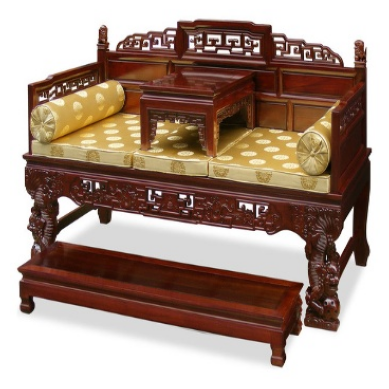

╭────────╮
│ chairs │
╰────────╯


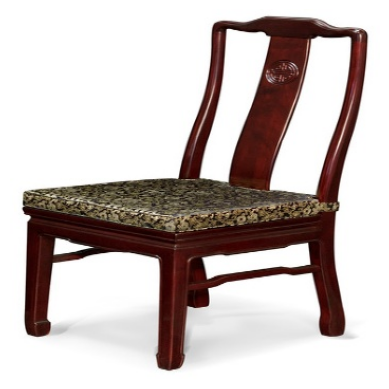

╭──────────╮
│ dressers │
╰──────────╯


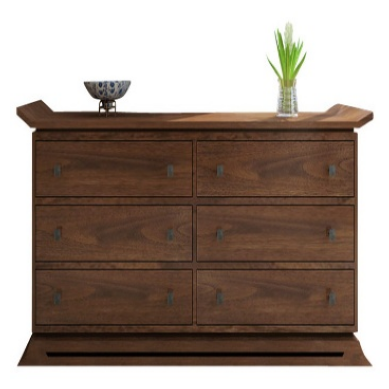

╭───────╮
│ lamps │
╰───────╯


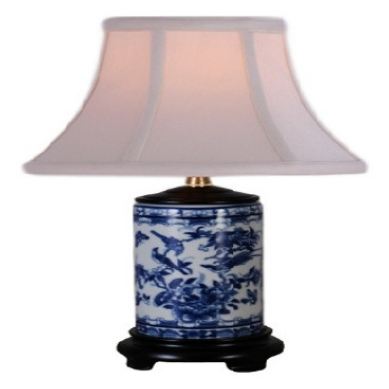

╭───────╮
│ sofas │
╰───────╯


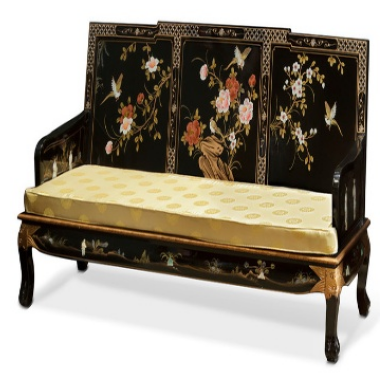

╭────────╮
│ tables │
╰────────╯


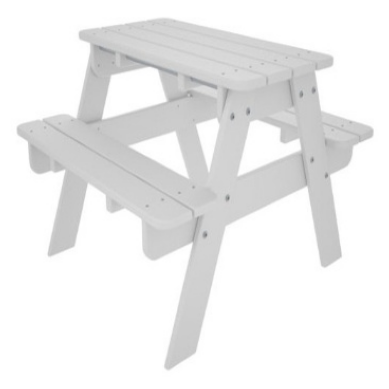

In [ ]:
# Print the first 5 images
count = 0
for i in style_folders:
    for category, folder_path in image_dir.items():
        if count == 6:
            break
        style_folder_path = os.path.join(folder_path, i)

        # Print images key
        styler.boxify(f"{category}")

        images = leon.read_images(path=style_folder_path, limit=1)

        count += 1

### Initial Data Exploration

This initial exploration provides a high-level summary of the dataset characteristics. Here are the key findings:

- The dataset comprises over `90,000` images.
- Each image is linked to a specific style, with a total of `six` unique styles represented within the dataset.

### Subsequent Analysis

We will now proceed with a more in-depth examination of the dataset. This will involve identifying and resolving any **inconsistencies** or **duplicate entries** within the data. Additionally, we will conduct a univariate analysis to gain a clearer understanding of the data distribution and individual attributes. 

&rArr; This process will help us uncover any potential issues that might influence the performance of our machine learning model.

In [ ]:
# for i in styles_array:
styler.boxify("Duplicate Images Handling")

print("\n Deleting duplicate images... \n")
for category, folder_path in image_dir.items():
    # Print images key
    for i in style_folders:
        style_folder_path = os.path.join(folder_path, i)

        leon.detect_duplicates(
            path=style_folder_path, limit=-1, hash_type="ahash", is_delete=True
        )
print("\n Duplicate images deleted successfully! \n")

╭───────────────────────────╮
│ Duplicate Images Handling │
╰───────────────────────────╯

 Deleting duplicate images... 


 Duplicate images deleted successfully! 



### Univariate Analysis

In this comprehensive **univariate analysis**, we delve into various aspects of the image dataset, providing valuable insights into each category's characteristics.

**Image Type Analysis:**
This segment examines the distribution of **image types** within the dataset. By counting occurrences of different image file extensions (e.g., `.jpg`, `.png`), we gain insights into the variety and prevalence of **image formats** present. Additionally, we check for the presence of non-image files to ensure **data integrity**.

**Aspect Ratio Distribution:**
This segment investigates the **aspect ratio** (width/height) distribution for each image, shedding light on common aspect ratios and variations across different categories.

**Image Size Distribution:**
The analysis explores the variability in **image dimensions** within each category, providing an understanding of the range and distribution of **image sizes**.

**Transparency Analysis:**
**Transparency analysis** investigates the presence and distribution of **transparent regions** within the images. Understanding the extent of transparency in images is crucial for various applications, such as overlaying images or compositing. By analyzing transparency levels across different image categories, we gain insights into the complexity and composition of the images.

**Pixel Intensity Distribution:**
Examining the **pixel intensity distribution** offers insights into the brightness and contrast levels present in the images. This analysis helps identify trends and variations within each category.

**Texture Analysis:**
**Texture analysis** focuses on understanding the texture complexity within images. By analyzing texture gradients and features such as gradient magnitude and **Histogram of Oriented Gradients (HOG)**, we gain insights into the texture patterns present in the dataset.

By thoroughly exploring these aspects, we aim to gain a deeper understanding of the dataset's characteristics, which can inform subsequent modeling and analysis tasks.



In [ ]:
import cv2

def load_image(image_path):
    try:
        # Load the image using OpenCV
        image = cv2.imread(image_path)
        # Convert the image to RGB format (OpenCV loads images in BGR format by default)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image
    except Exception as e:
        return None

#### Image Type Analysis:
In this section, we **analyze** the types of files present in the data directory. By examining the **file extensions** of each file, we identify the variety of **file types** present in the dataset. This analysis is crucial for understanding the **composition** of the dataset and ensuring **data integrity**.


In [ ]:
def image_type_analysis(image_dir):
    # Initialize a hashmap to count image types
    image_type_counts = {}

    # Initialize a list to store non_images paths
    non_images = []

    # Iterate over each category in the image directory
    for category, folder_path in image_dir.items():

        # Get all style folders within the current category
        style_folders = [
            sub_folder
            for sub_folder in os.listdir(folder_path)
            if os.path.isdir(os.path.join(folder_path, sub_folder))
        ]

        # Iterate over the style folders
        for style_folder in style_folders:
            style_folder_path = os.path.join(folder_path, style_folder)

            # Iterate over images in the style folder
            for image_name in os.listdir(style_folder_path):
                # Load the image using the load_image function
                image_path = os.path.join(style_folder_path, image_name)
                image = load_image(image_path)

                if image is not None:
                   # Get the file extension (image type)
                    image_type = os.path.splitext(image_path)[1].lower()

                # Update the count for the image type in the hashmap
                    if image_type in image_type_counts:
                        image_type_counts[image_type] += 1
                    else:
                        image_type_counts[image_type] = 1
                else:
                    # If it's not an image, add it to the list of non_images
                    non_images.append(image_path)

    # Print the list of non-images for debugging or further analysis
    styler.boxify(f"Non-images in Data Directory")
    for non_images in non_images:
        print(f"{non_images}")

    styler.boxify(f"Image Type Analysis:")
    for image_type, count in image_type_counts.items():
        print(f"{image_type}: {count}")

In [ ]:
image_type_analysis(image_dir)

╭──────────────────────────────╮
│ Non-images in Data Directory │
╰──────────────────────────────╯
c:\Users\huuqu\Academic\RMIT\Machine Learning\MLGroup\data\raw\Furniture_Data\Furniture_Data\lamps\Modern\11286modern-lighting.jpg
╭──────────────────────╮
│ Image Type Analysis: │
╰──────────────────────╯
.jpg: 81934
.jpgd: 1


**Observation:**
- The majority of files in the data directory are **JPEG (.jpg)** images, with a count of `81,934`.
- Additionally, there is one file with the extension "**.jpgd**", which appears to be an anomaly or potential **data integrity issue**.
- There's one **corrupted non-images file** in the data directory with a path "\lamps\Modern\11286modern-lighting.jpg"

**Insights:**
- The presence of a non-standard file extension (**.jpgd**) may require further investigation to understand its significance or potential impact on the dataset.
- Overall, the dataset primarily consists of **JPEG images**, indicating a common and widely used image format.
- Before we perform **preprocessing**, we should consider the directory when running functions by checking if image is **None** to avoid errors.


##### Further Investigation of .jpgd File
As part of our continued analysis, we aim to verify the integrity of the ".jpgd" file. Despite initial indications suggesting it may be an image, it's prudent to ensure it's not **corrupted**. Let's examine the file by displaying its contents.


In [ ]:
def find_jpgd_file(image_dir):

    jpgd_file = None

     # Iterate over each category in the image directory
    for category, folder_path in image_dir.items():

        # Get all style folders within the current category
        style_folders = [
            sub_folder
            for sub_folder in os.listdir(folder_path)
            if os.path.isdir(os.path.join(folder_path, sub_folder))
        ]

        # Iterate over the style folders
        for style_folder in style_folders:
            style_folder_path = os.path.join(folder_path, style_folder)

            # Iterate over images in the style folder
            for image_name in os.listdir(style_folder_path):
                # Check if the file has the extension ".jpgd"
                image_path = os.path.join(style_folder_path, image_name)

                if image_path.lower().endswith(".jpgd"):
                    jpgd_file = image_path
                    break  # Stop searching once the first ".jpgd" file is found
        if jpgd_file:
            break  # Stop searching if the ".jpgd" file is found

    return jpgd_file

╭───────────╮
│ JPGD File │
╰───────────╯
Path: c:\Users\huuqu\Academic\RMIT\Machine Learning\MLGroup\data\raw\Furniture_Data\Furniture_Data\dressers\Farmhouse\30826farmhouse-coffee-tables.jpgD


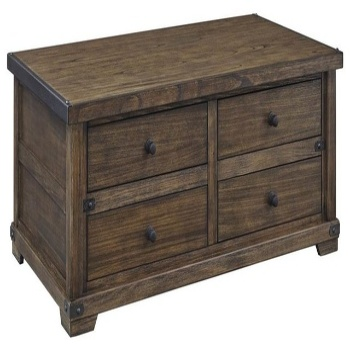

In [ ]:
from PIL import Image
from IPython.display import display

styler.boxify(f"JPGD File")
jpgd_file = find_jpgd_file(image_dir)

if jpgd_file == None:
    print(f"No JPGD file found")
else:
    print(f"Path: {jpgd_file}")
    # Open the .jpgd file using Pillow
    jpgd_image = Image.open(jpgd_file)

    # Display the image in the notebook
    display(jpgd_image)

- Despite the unusual file extension, the image displays normally without any apparent **corruption** or **distortion**.
- Further investigation into the ".jpgd" file type may be warranted to understand its specific characteristics or encoding scheme.
- While the file displays as an image without issues, its unique file extension may require additional consideration during **data processing** or **analysis tasks**.


#### Aspect Ratio Distribution:
The **aspect ratio** (width/height) for each image is calculated to analyze its distribution. This analysis helps identify common **aspect ratios** or significant variations across images within each category.

In [ ]:
def aspect_ratio_analysis(image_dir):
    # Get all categories
    categories = list(image_dir.keys())

    # Create a figure and axes for the grid layout
    fig, ax = plt.subplots(figsize=(8, 4))

    # Initialize lists to store average aspect ratios and category labels
    avg_ratios = []
    category_labels = []

    # Iterate over the categories
    for category in categories:
        # Get all style folders within the current category
        folder_path = image_dir[category]
        style_folders = [
            sub_folder
            for sub_folder in os.listdir(folder_path)
            if os.path.isdir(os.path.join(folder_path, sub_folder))
        ]

        # Initialize lists to store aspect ratios for each style
        all_ratios = []

        # Iterate over the style folders
        for style_folder in style_folders:
            style_folder_path = os.path.join(folder_path, style_folder)

            # Iterate over images in the style folder
            for image_name in os.listdir(style_folder_path):
                # Load the image using the load_image function
                image_path = os.path.join(style_folder_path, image_name)
                image = load_image(image_path)

                # Calculate the aspect ratio (width/height)
                if image is not None:
                    height, width, _ = image.shape
                    aspect_ratio = width / height
                    all_ratios.append(aspect_ratio)

        # Calculate the average aspect ratio for the current category
        avg_ratio = np.mean(all_ratios)
        avg_ratios.append(avg_ratio)
        category_labels.append(category)

    # Plot bar chart of average aspect ratios for all categories
    ax.bar(category_labels, avg_ratios, color='#aadcf0')
    ax.set_xlabel('Category')
    ax.set_ylabel('Average Aspect Ratio')
    ax.set_title('Average Aspect Ratio by Category')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

╭───────────────────────╮
│ Aspect Ratio Analysis │
╰───────────────────────╯


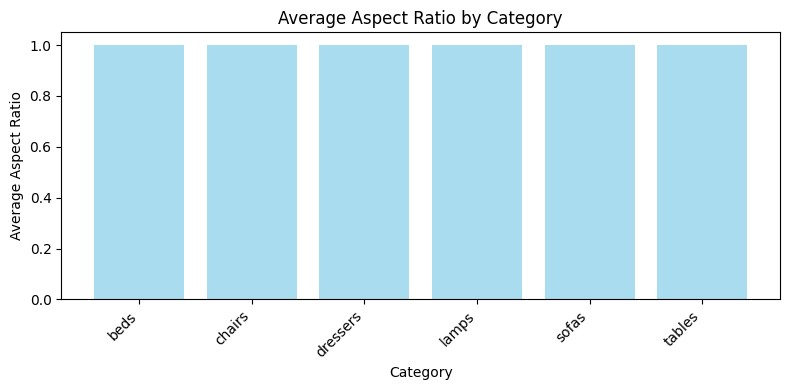

In [ ]:
styler.boxify(f"Aspect Ratio Analysis")

# Call the aspect_ratio_analysis function
aspect_ratio_analysis(image_dir)

We calculated the average **aspect ratio**, which is the ratio between **width** and **height**, across each **category** in the dataset. Surprisingly, all categories showed an average aspect ratio value of `1`. This implies that every image within the dataset has identical width and height dimensions, suggesting **uniformity** in image size across the dataset.


#### Image Size Distribution:
This step examines the variation in **image dimensions** within each **category** or **style folder**. By analyzing the **width** and **height** of each image, we gain insights into the **range** and **distribution** of image sizes. Understanding image dimensions helps in preprocessing tasks like **resizing** for model compatibility.

In [ ]:
def image_size_analysis(image_dir):
    # Get all categories
    categories = list(image_dir.keys())

    # Define the number of columns for the grid
    num_cols = 4

    # Calculate the number of rows needed based on the number of categories and columns
    num_rows = int(np.ceil(len(categories) / num_cols))

    # Create a figure and axes for the grid layout
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows), sharex=True, sharey=True)
    axes = axes.flatten()

    # Iterate over the categories
    for i, category in enumerate(categories):

        # Get the folder path for the current category
        folder_path = image_dir[category]

        # Get all subfolders in the directory
        style_folders = [
            sub_folder
            for sub_folder in os.listdir(folder_path)
            if os.path.isdir(os.path.join(folder_path, sub_folder))
        ]

        widths = []

        # Iterate over the style folders
        for style_folder in style_folders:
            style_folder_path = os.path.join(folder_path, style_folder)

            # Iterate over images in the style folder
            for image_name in os.listdir(style_folder_path):
                # Load the image using the load_image function
                image_path = os.path.join(style_folder_path, image_name)
                image = load_image(image_path)

                # Skip the iteration round if image loading failed
                if image is None:
                    continue

                _, width, _ = image.shape
                widths.append(width)

        # Calculate and display min, max, and average width for the current category
        min_width = min(widths)
        max_width = max(widths)
        avg_width = np.mean(widths)

        styler.boxify(f"{category} Average Width: {avg_width}")

        # Plot bar chart of min, max, and average width for the current category
        axes[i].bar(['Max Width', 'Min Width', 'Average Width'],
                    [max_width, min_width, avg_width],
                    color=['#aadcf0', '#aadcf0', '#ffcacf'])
        axes[i].set_ylabel('Dimension')
        axes[i].set_title(f'{category}')

        # Set x-axis labels
        axes[i].set_xticks(np.arange(3))
        axes[i].set_xticklabels(['Max W', 'Min W', 'Avg W'])

    # Hide any remaining axes
    for j in range(len(categories), num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

╭─────────────────────╮
│ Image Size Analysis │
╰─────────────────────╯
╭───────────────────────────────────────╮
│ beds Average Width: 224.6139789858383 │
╰───────────────────────────────────────╯
╭─────────────────────────────╮
│ chairs Average Width: 350.0 │
╰─────────────────────────────╯
╭───────────────────────────────╮
│ dressers Average Width: 350.0 │
╰───────────────────────────────╯
╭────────────────────────────╮
│ lamps Average Width: 350.0 │
╰────────────────────────────╯
╭────────────────────────────╮
│ sofas Average Width: 350.0 │
╰────────────────────────────╯
╭─────────────────────────────────────────╮
│ tables Average Width: 350.0090361445783 │
╰─────────────────────────────────────────╯


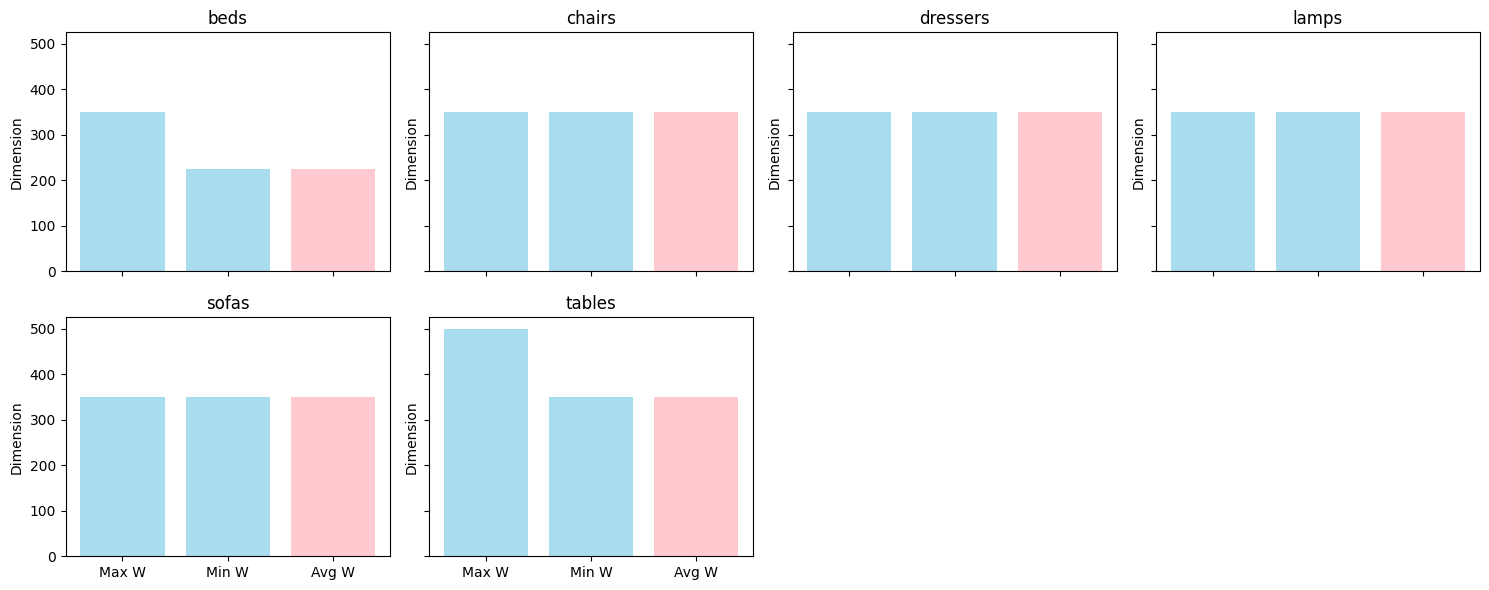

In [ ]:
styler.boxify(f"Image Size Analysis")

# Call the image_size_analysis function
image_size_analysis(image_dir)

We conducted an analysis to determine the **average image size** within each **category**, focusing on the **maximum**, **minimum**, and **average width**. Since all images have an **aspect ratio of 1**, we focused solely on **width**.

Across most categories, the average width clustered around `350 pixels`. However, there were notable variations. For instance, images within the "**beds**" category exhibited a lower average width of approximately `200 pixels`, with some outliers reaching around `350 pixels` in width. Conversely, the "**tables**" category displayed maximum width outliers reaching `500 pixels`, with an average width of `350 pixels`.

These findings suggest a need for **preprocessing adjustments** to ensure consistency in image sizes across categories.


#### Transparency Analysis:
This step examines the **presence** and **extent** of **transparency** within images across different **categories** or **style folders**. Understanding **transparency levels** provides insights into image **complexity** and usage of **transparent elements**.


In [ ]:
def load_image_RGBA(image_path):
    try:
        # Load the image using PIL
        image = Image.open(image_path)

        # Convert the image to RGBA format if it has an alpha channel
        if image.mode != "RGBA":
            image = image.convert("RGBA")

        return np.array(image)
    except Exception as e:
        return None


In [ ]:
def calculate_transparency(image):
    try:
        # Ensure the image has 4 channels (RGBA)
        if image.shape[2] != 4:
            raise ValueError("Image must have 4 channels (RGBA)")

        # Extract alpha channel from the image
        alpha_channel = image[:, :, 3]

        # Calculate transparency level (percentage of transparent pixels)
        transparent_pixels = (alpha_channel == 0).sum()
        total_pixels = alpha_channel.size

        transparency_level = transparent_pixels / total_pixels * 100
        return transparency_level
    except Exception as e:
        return None


In [ ]:
def transparency_analysis(image_dir):

    count = 0;

    # Iterate over each category or style folder in the image directory
    for category, folder_path in image_dir.items():

        # Get all style folders within the current category or style folder
        style_folders = [
            sub_folder
            for sub_folder in os.listdir(folder_path)
            if os.path.isdir(os.path.join(folder_path, sub_folder))
        ]


        # Iterate over the style folders
        for style_folder in style_folders:
            style_folder_path = os.path.join(folder_path, style_folder)

            # Iterate over images in the style folder
            for image_name in os.listdir(style_folder_path):
                image_path = os.path.join(style_folder_path, image_name)
                # Load the image
                image = load_image_RGBA(image_path)

                if image is not None:
                    # Perform transparency analysis on the image
                    transparency_level = calculate_transparency(image)
                    if transparency_level > 0:
                        count += 1

    return count

In [ ]:
styler.boxify(f"Transparency Analysis")
count = transparency_analysis(image_dir)
print(f"Transparent Image Count: {count}")

╭───────────────────────╮
│ Transparency Analysis │
╰───────────────────────╯
Transparent Image Count: 0


- The **transparency analysis** has been conducted across the dataset, revealing that there are no **transparent images** present.
- Despite analyzing images across different **categories** and **style folders**, none of the images exhibit **transparency**.


#### Pixel Intensity Distribution:
For each image within each **style folder**, the **mean pixel intensity** is calculated. **Pixel intensity** represents the average brightness of the image and provides insights into its overall appearance.


In [ ]:
def pixel_intensity_analysis(image_dir):
    # Iterate over the image directories
    for category, folder_path in image_dir.items():
        # Print images key
        styler.boxify(f"Pixel Intensity Analysis: {category}")

        # Get all subfolders in the directory
        style_folders = [
            sub_folder
            for sub_folder in os.listdir(folder_path)
            if os.path.isdir(os.path.join(folder_path, sub_folder))
        ]

        # Collect pixel intensity data for all style folders within the category
        all_pixel_intensities = []

        # Iterate over the style folders
        for style_folder in style_folders:
            style_folder_path = os.path.join(folder_path, style_folder)
            # Collect pixel intensity values here for each image attribute

            pixel_intensities = []

            # Iterate over images in the style folder
            for image_name in os.listdir(style_folder_path):
                # Load the image using the load_image function
                image_path = os.path.join(style_folder_path, image_name)
                image = load_image(image_path)

                # Skip the iteration round if image loading failed
                if image is None:
                    continue

                # Calculate the mean pixel intensity and store it
                mean_intensity = np.mean(image)
                pixel_intensities.append(mean_intensity)

            # Add pixel intensity data for the current style folder to the list
            all_pixel_intensities.append(pixel_intensities)

        # Plot all pixel intensity distributions for the current category in a grid
        num_styles = len(style_folders)
        num_cols = 4  # Adjust the number of columns for the grid
        num_rows = int(np.ceil(num_styles / num_cols))  # Adjust the number of rows for the grid
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows), sharex=True, sharey=True)
        axes = axes.flatten()

        for i, pixel_intensities in enumerate(all_pixel_intensities):
            axes[i].hist(pixel_intensities, bins=20, color='#ffcacf', alpha=0.7)
            axes[i].set_xlabel('Pixel Intensity')
            axes[i].set_ylabel('Frequency')
            axes[i].set_title(f'{style_folders[i]}')

        # Hide any remaining axes
        for j in range(num_styles, num_rows*num_cols):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()

╭────────────────────────────────╮
│ Pixel Intensity Analysis: beds │
╰────────────────────────────────╯


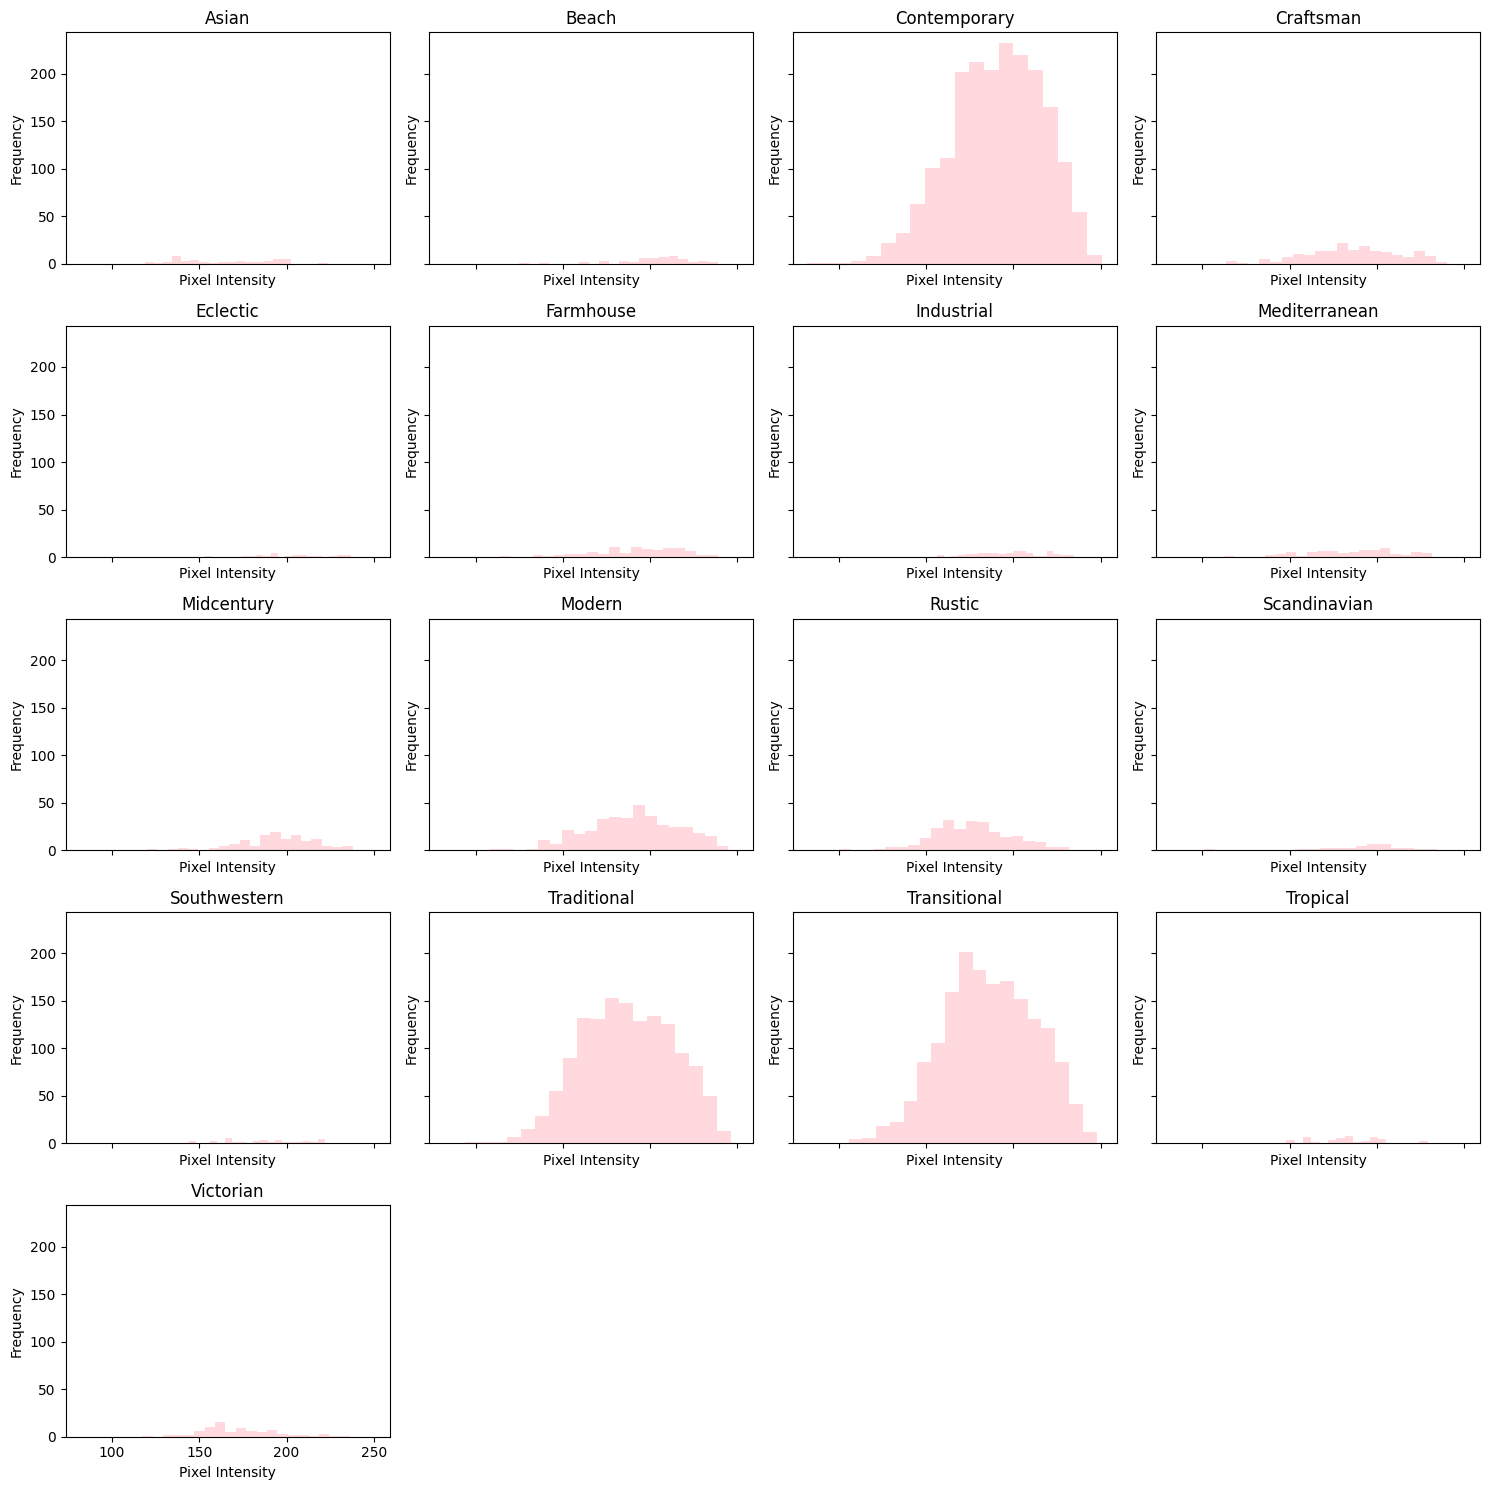

╭──────────────────────────────────╮
│ Pixel Intensity Analysis: chairs │
╰──────────────────────────────────╯


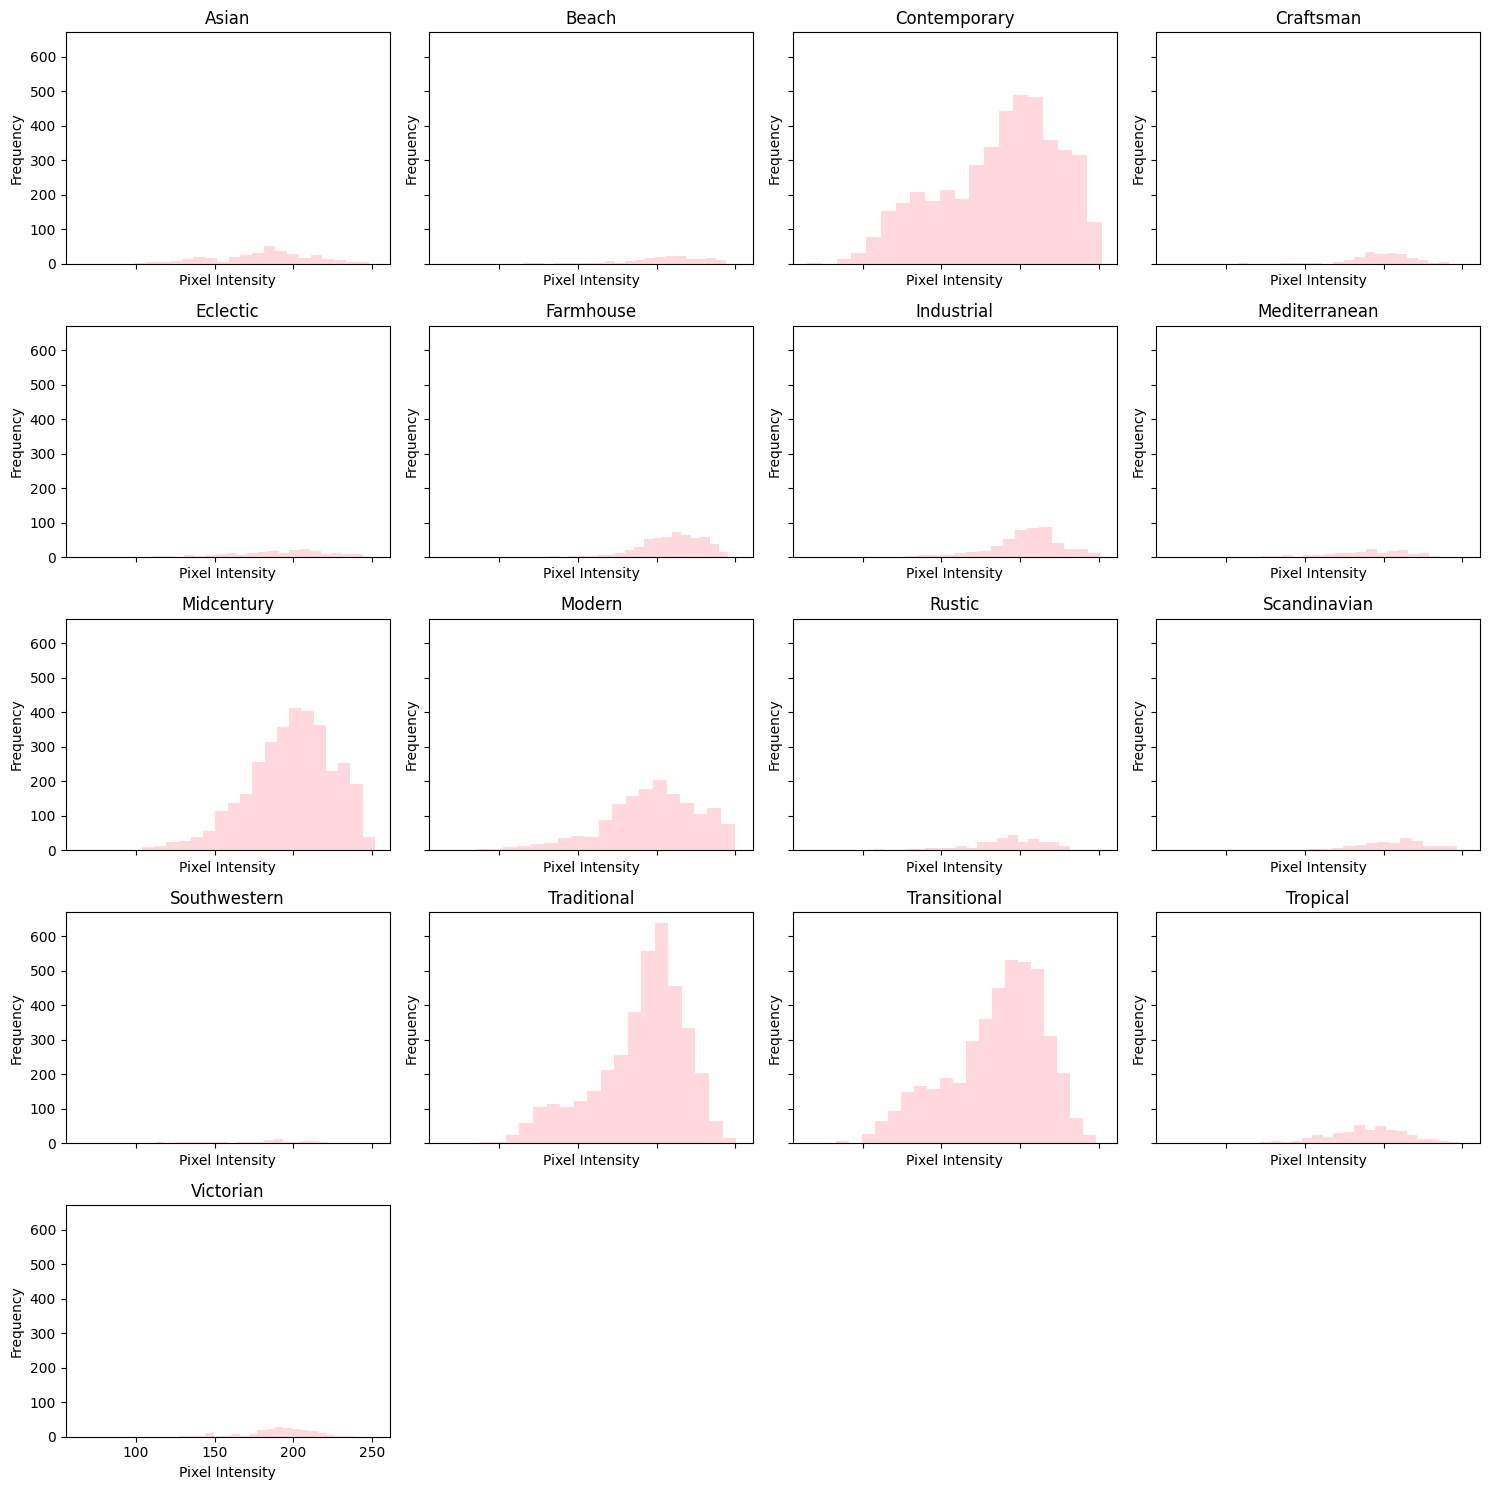

╭────────────────────────────────────╮
│ Pixel Intensity Analysis: dressers │
╰────────────────────────────────────╯


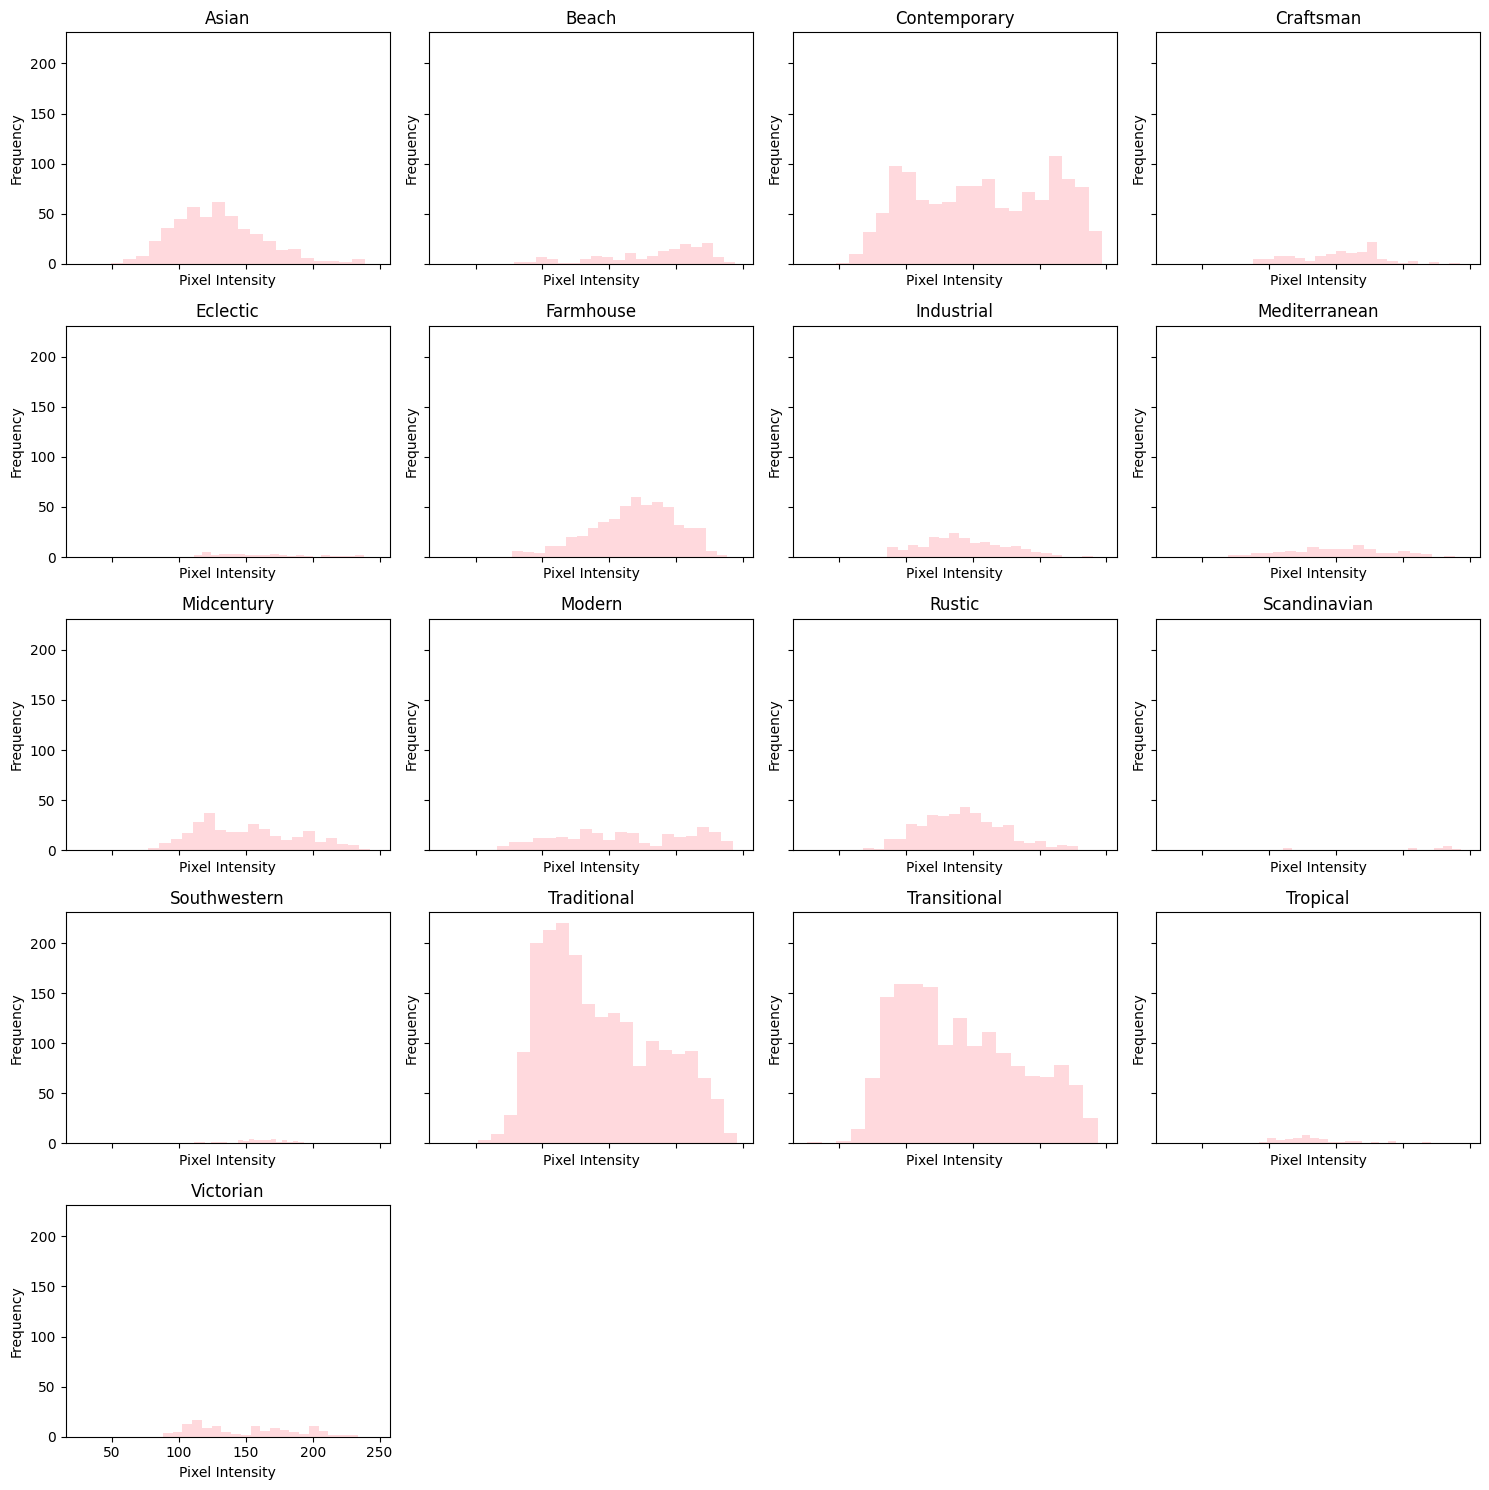

╭─────────────────────────────────╮
│ Pixel Intensity Analysis: lamps │
╰─────────────────────────────────╯


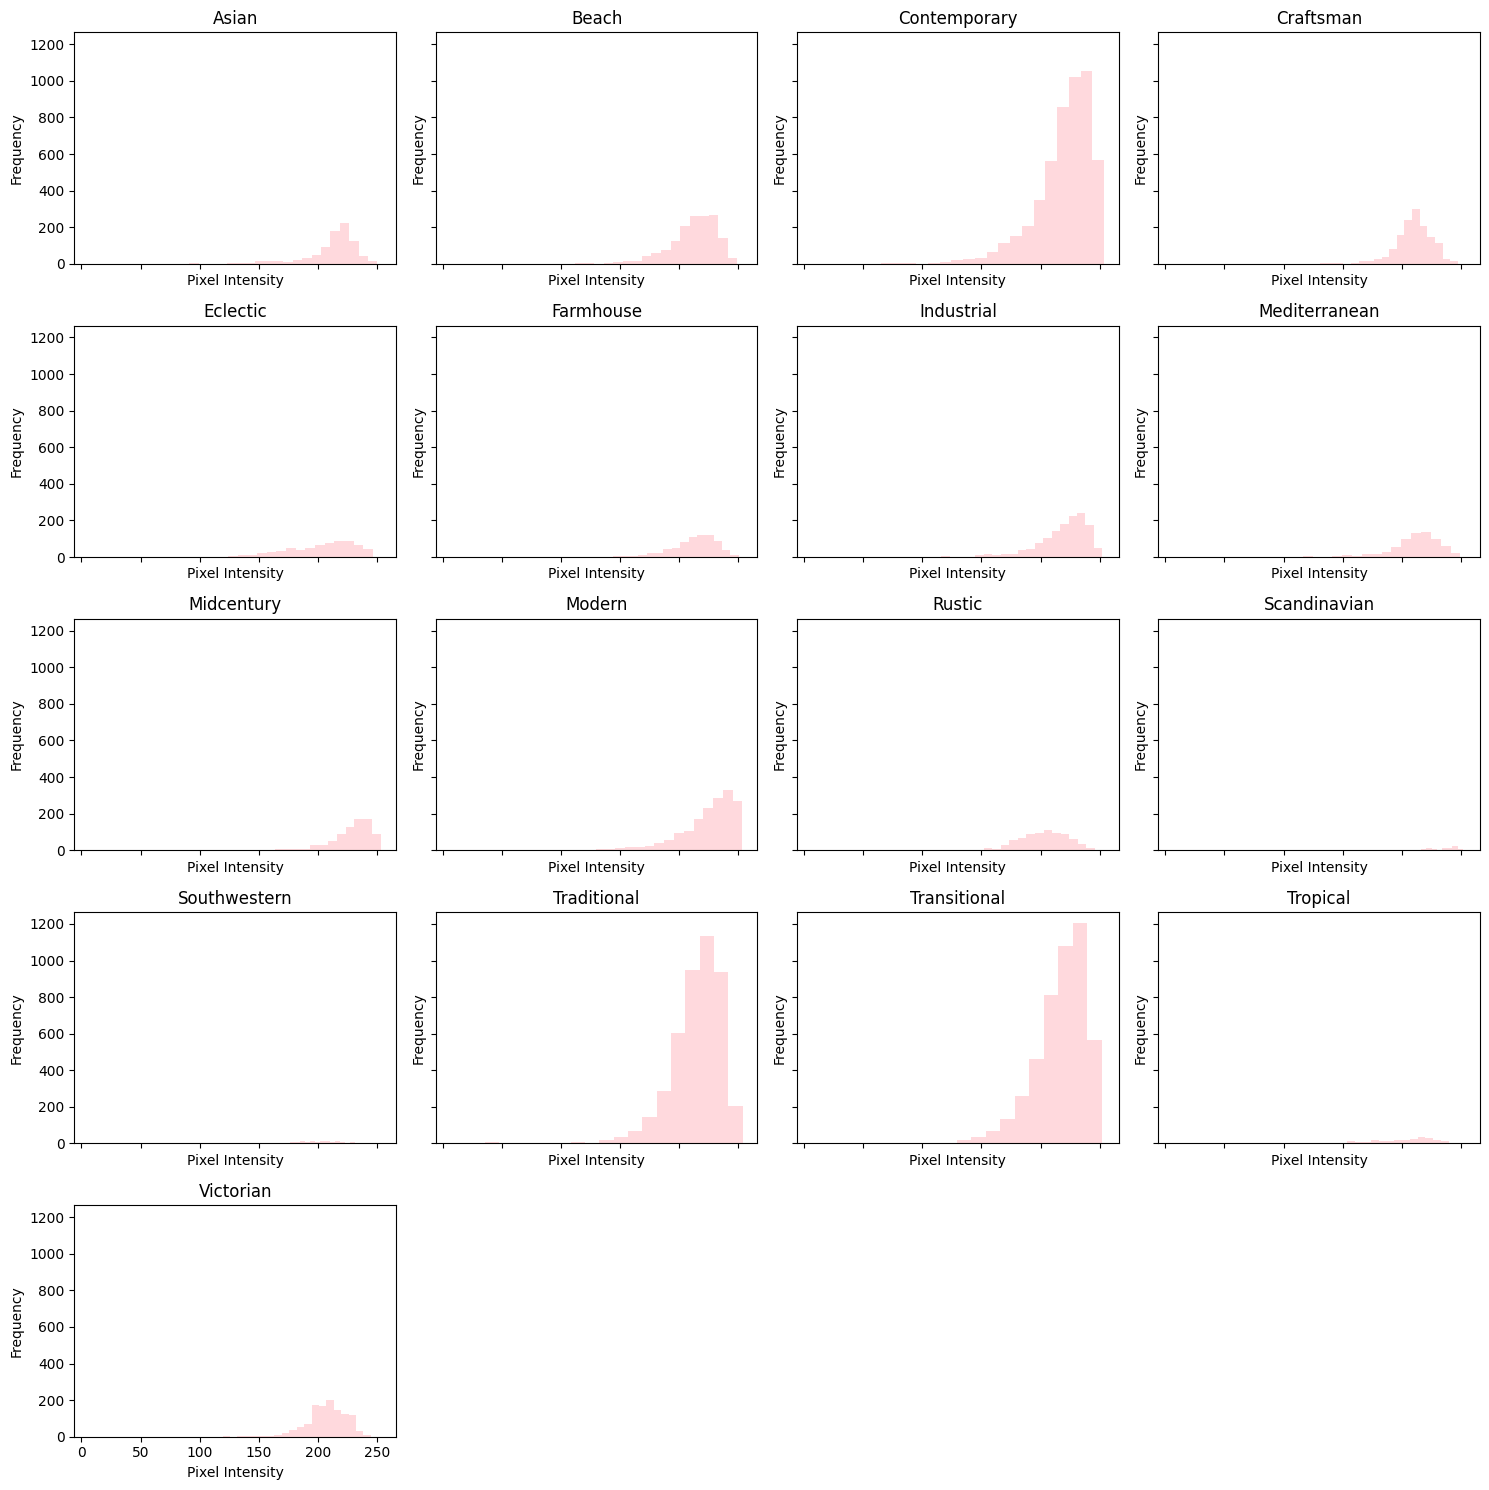

╭─────────────────────────────────╮
│ Pixel Intensity Analysis: sofas │
╰─────────────────────────────────╯


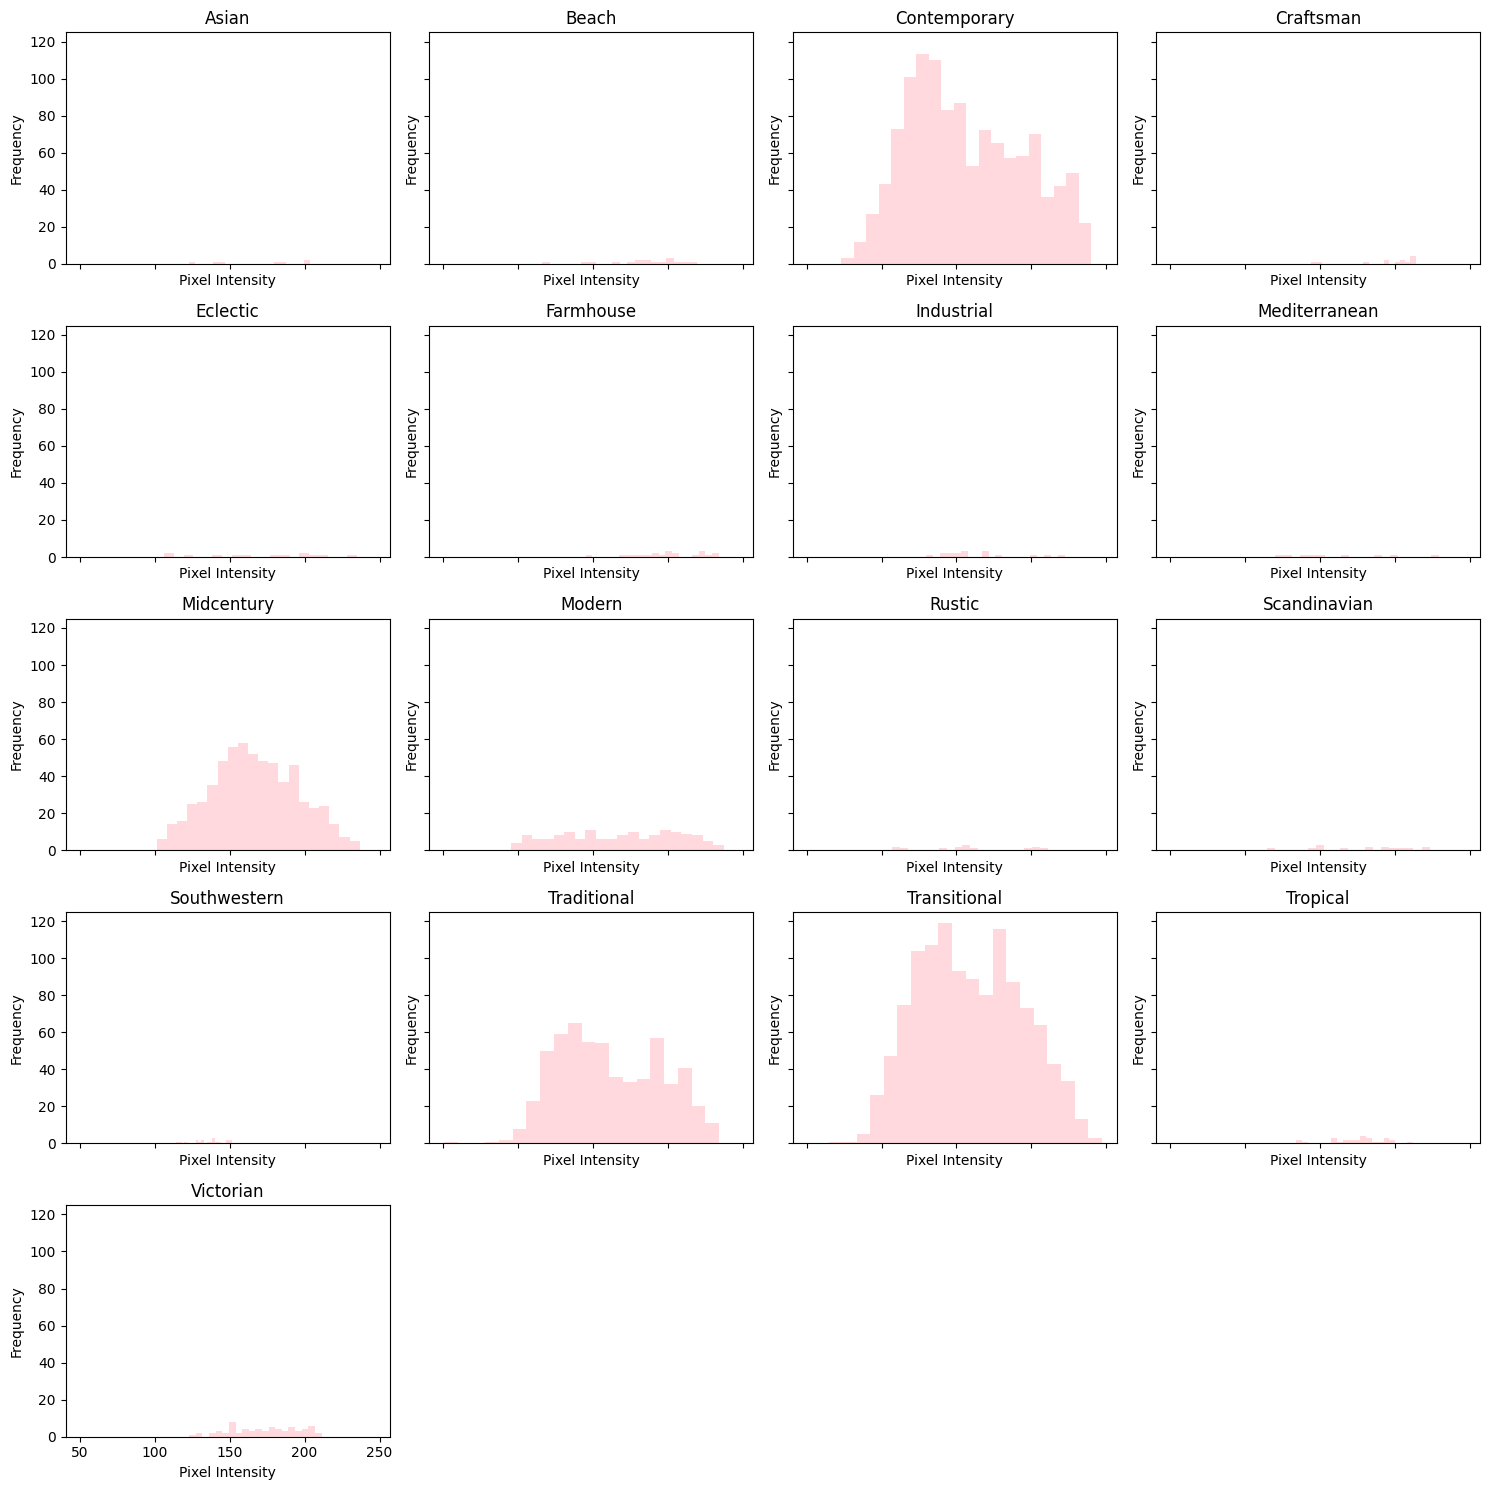

╭──────────────────────────────────╮
│ Pixel Intensity Analysis: tables │
╰──────────────────────────────────╯


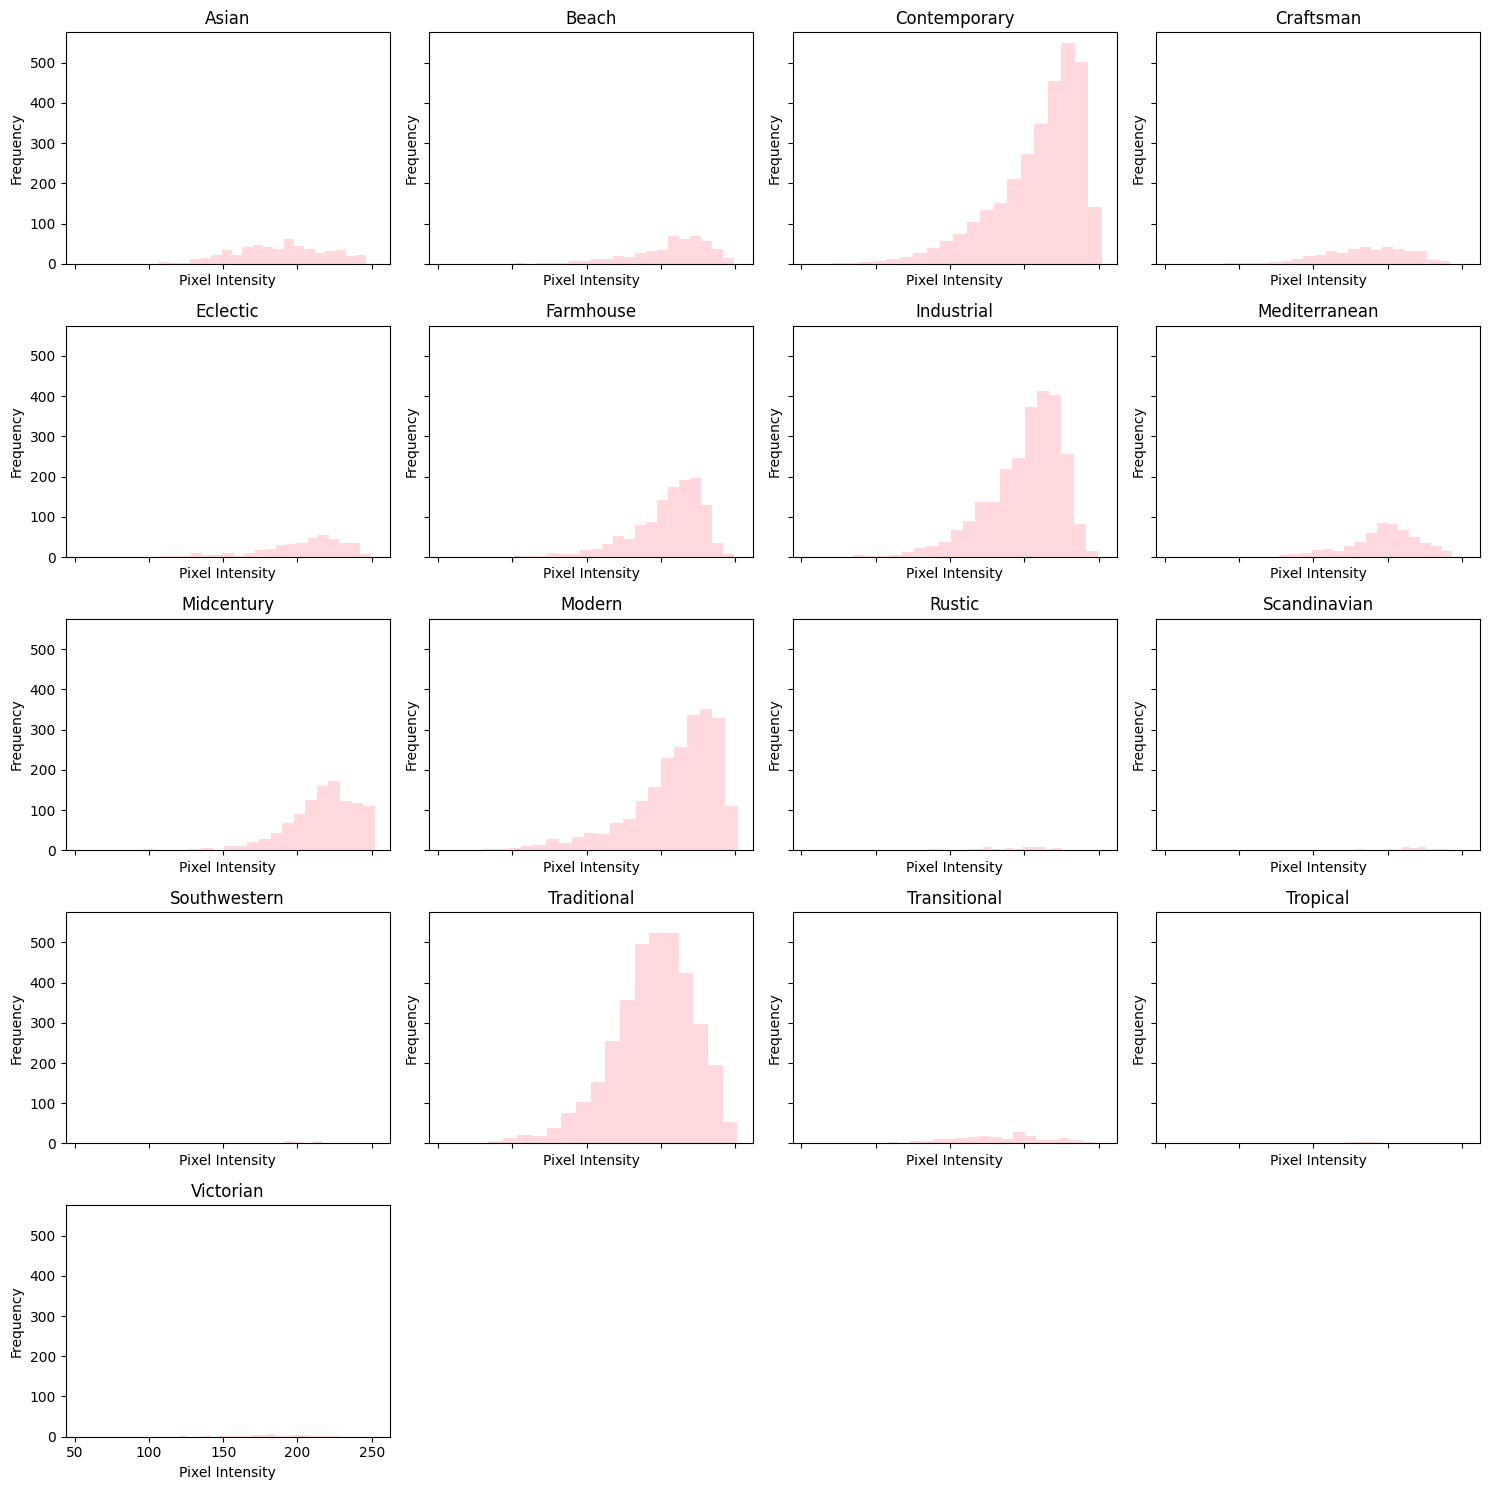

In [ ]:
# Call the pixel_intensity_analysis function
pixel_intensity_analysis(image_dir)

We performed **pixel intensity analysis** for each **style** within every **category**:

**For the 'beds' category:**
- High pixel intensity in **contemporary**, **traditional**, and **transitional** styles (max around `240`).
- Moderately high intensity in **modern** and **rustic** styles (max around `50`).
- Other styles have lower intensities (`<25`).

**For the 'chairs' category:**
- High pixel intensity in **contemporary**, **traditional**, and **transitional** styles (max `500-600`).
- Moderately high intensity in **midcentury** and **modern** styles (max around `400` and `200`, respectively).
- Other styles have lower intensities (`<50`).

**For the 'dressers' category:**
- High pixel intensity in **traditional** and **transitional** styles (max `250` and `150`, respectively).
- Moderate intensity in **contemporary** style (max `100`).
- Lower intensities in **Asian** and **farmhouse** styles (max `70` and `60`, respectively).
- Other styles have intensities below `50`.

**For the 'lamps' category:**
- High pixel intensity in **contemporary**, **traditional**, and **transitional** styles (max `1100-1200`).
- Lower intensities in **Scandinavian** and **southwestern** styles (almost zero).
- Moderate intensity in **tropical** style (max `<50`).

**For the 'sofas' category:**
- High pixel intensity in **contemporary** and **transitional** styles (max around `120`).
- Moderate intensity in **midcentury** and **traditional** styles (max around `60`).
- Low intensity in the **model** style (around `15`) and other styles (almost zero).

**For the 'tables' category:**
- High pixel intensity in **contemporary** and **traditional** styles (max around `600`).
- Moderate intensity in **industrial** and **modern** styles (max around `400`).
- Lower intensities in **farmhouse** and **midcentury** styles (max around `200`).
- Other styles have intensities below `100`.

**Overall Tendency:**
- **Contemporary**, **traditional**, and **transitional** styles tend to have higher pixel intensities.
- **Modern** and **rustic** styles exhibit relatively lower pixel intensities across all categories.


Inconsistent **pixel intensity distributions** across different **styles** within each **category** can lead to reduced **model generalization**, biased **pixel intensity analysis**, unreliable **feature extraction**, and misleading **insights**.

Employing **normalization techniques** to standardize pixel intensities ensures consistency across images. Additionally, considering **data augmentation methods** to enrich the dataset with variations in pixel intensities enhances model **robustness** and **reliability**.


#### Texture Analysis

**Texture analysis** involves characterizing the visual patterns present in images. In this analysis, we utilize **texture features** such as **texture gradients** to capture the variations in texture across different images within each **category**. The texture gradients are calculated using the **Sobel operator**, and their distributions are visualized using **histograms**. This analysis helps in understanding the **texture properties** of images and can be useful for various **image processing tasks**.


In [ ]:
def texture_analysis(image_dir):
    # Get all categories
    categories = list(image_dir.keys())

    # Calculate the number of rows and columns needed for the subplots
    num_rows = len(categories)
    num_cols = 2  # Two categories per row

    # Create a figure and axes for the grid layout
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

    # Iterate over the categories
    for i, category in enumerate(categories):
        # Get all style folders within the current category
        folder_path = image_dir[category]
        style_folders = [
            sub_folder
            for sub_folder in os.listdir(folder_path)
            if os.path.isdir(os.path.join(folder_path, sub_folder))
        ]

        # Initialize lists to store texture gradients for each style
        all_gradients = []

        # Iterate over the style folders
        for style_folder in style_folders:
            style_folder_path = os.path.join(folder_path, style_folder)

            # Iterate over images in the style folder
            for image_name in os.listdir(style_folder_path):
                # Load the image using the load_image function
                image_path = os.path.join(style_folder_path, image_name)
                image = load_image(image_path)

                # Calculate texture gradients using the Sobel operator
                if image is not None:
                    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
                    gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
                    gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
                    gradient = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
                    texture = np.mean(gradient)
                    all_gradients.append(texture)

        # Plot histogram of texture gradients for the current category
        row_index = i // num_cols
        col_index = i % num_cols
        axes[row_index, col_index].hist(all_gradients, bins=20, color='#aadcf0', alpha=0.7)
        axes[row_index, col_index].set_xlabel('Texture Gradient')
        axes[row_index, col_index].set_ylabel('Frequency')
        axes[row_index, col_index].set_title(f'Texture Analysis: {category}')

    # Hide any remaining axes
    for j in range(len(categories), num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()


╭──────────────────╮
│ Texture Analysis │
╰──────────────────╯


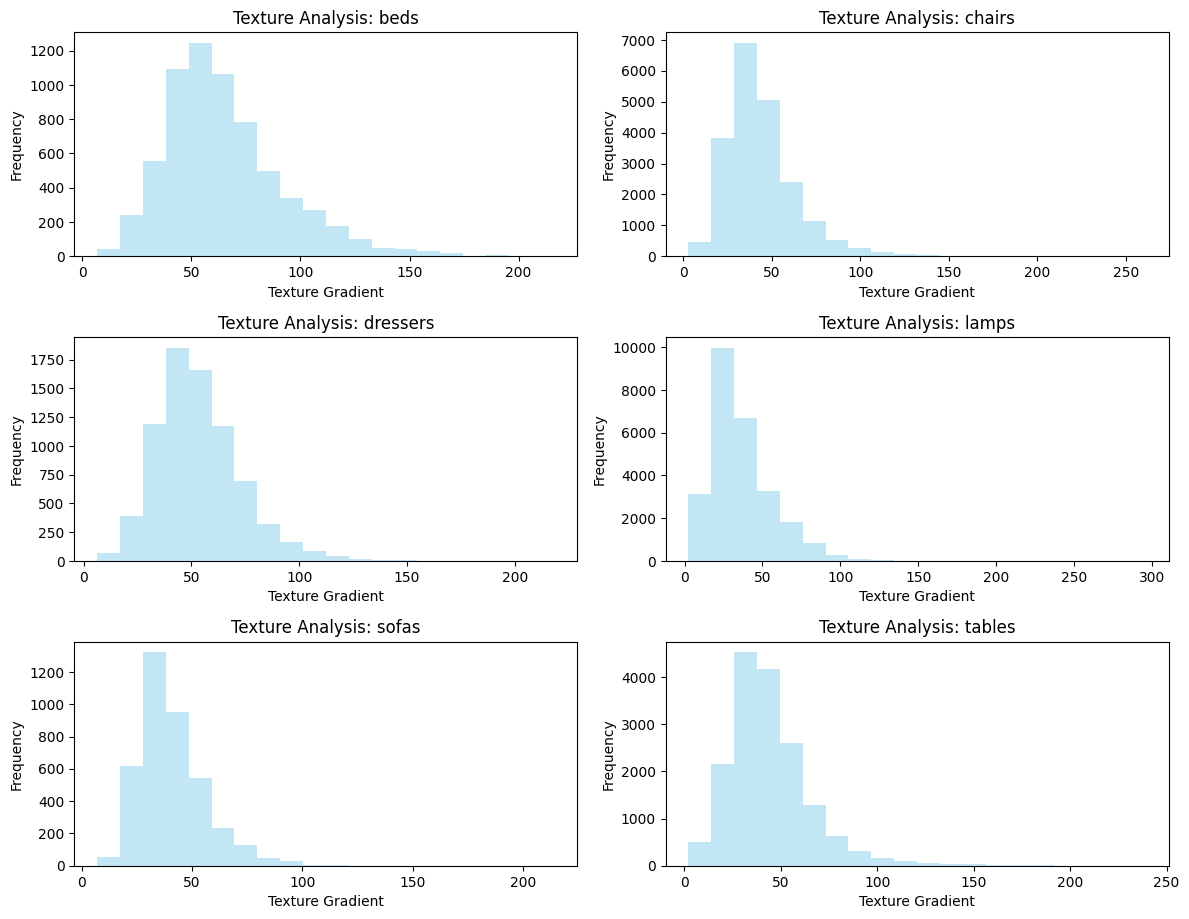

In [ ]:

styler.boxify(f"Texture Analysis")

# Call the texture_analysis function
texture_analysis(image_dir)

We performed **texture analysis** across all **categories**:

**For the 'beds' category:**
- **Texture gradient** ranges from `0` to `200`.
- **Frequency** ranges from `0` to `1200`.
- Frequency condenses from gradient `30` to `80`.
- Frequencies are almost zero from gradient `170` to `200`.

**For the 'chairs' category:**
- **Texture gradient** ranges from `0` to `250`.
- **Frequency** ranges from `0` to `7000`.
- Frequency condenses from gradient `30` to `55`.
- Frequencies are almost zero from gradient `150` to `250`.

**For the 'dressers' category:**
- **Texture gradient** ranges from `0` to `200`.
- **Frequency** ranges from `0` to `1780`.
- Frequency condenses from gradient `30` to `70`.
- Frequencies are almost zero from gradient `130` to `200`.

**For the 'lamps' category:**
- **Texture gradient** ranges from `0` to `300`.
- **Frequency** ranges from `0` to `10000`.
- Frequency condenses from gradient `0` to `70`.
- Frequencies are almost zero from gradient `120` to `300`.

**For the 'sofas' category:**
- **Texture gradient** ranges from `0` to `200`.
- **Frequency** ranges from `0` to `1200`.
- Frequency condenses from gradient `15` to `60`.
- Frequencies are almost zero from gradient `100` to `200`.

**For the 'tables' category:**
- **Texture gradient** ranges from `0` to `250`.
- **Frequency** ranges from `0` to `4500`.
- Frequency condenses from gradient `20` to `60`.
- Frequencies are almost zero from gradient `120` to `250`.

**Overall Tendency:**
- **Texture gradient** tends to be lower, mostly ranging between `0` and `250`.
- **Frequency distribution** is skewed towards lower gradient values, with peaks around `30` to `80`.
- Higher gradient values, particularly above `100`, tend to have much lower **frequencies**.

Inconsistent **texture representations** due to varying **image characteristics** can cause reduced **model generalization**, biased **texture analysis**, unreliable **feature extraction**, and misleading **insights**.

We can consider **normalization** or **equalization techniques** to standardize **texture gradients**, ensuring consistency across images.


### Color Distribution

A **color distribution chart** provides a visual representation of the **frequency** of different **color intensities** within an image or set of images. In **RGB color models**, it plots each **color channel** (**Red**, **Green**, **Blue**) separately. These charts are used in **image analysis** to understand **color composition**, identify **dominant colors**, detect potential **color abnormalities**, and compare images based on their **color distributions**.
- `0` represents no intensity for that color, which is the darkest possible value, effectively contributing no color (black if all are `0`).
- `255` represents the maximum intensity, where the color is at its brightest or most saturated state.


In [ ]:
import os
from concurrent.futures import ThreadPoolExecutor


def process_image(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        img = cv2.resize(img, (128, 128))  # Resize to reduce computation
        reds = img[:, :, 0].flatten()
        greens = img[:, :, 1].flatten()
        blues = img[:, :, 2].flatten()
        return {"Red": reds, "Green": greens, "Blue": blues}
    return None  # Return None if loading fails


def aggregate_color_histogram(image_dir):
    with ThreadPoolExecutor() as executor:
        cols = 3  # Define the number of columns for the grid
        rows = (
            len(image_dir) + cols - 1
        ) // cols  # Calculate the number of rows needed
        plt.figure(
            figsize=(20, 5 * rows)
        )  # Set the figure size large enough to accommodate all subplots

        for index, (dataset, folder_path) in enumerate(image_dir.items(), start=1):
            all_color_data = []

            subfolders = [
                os.path.join(folder_path, sub)
                for sub in os.listdir(folder_path)
                if os.path.isdir(os.path.join(folder_path, sub))
            ]

            for subfolder in subfolders:
                image_files = [
                    os.path.join(subfolder, file)
                    for file in os.listdir(subfolder)
                    if file.lower().endswith((".png", ".jpg", ".jpeg"))
                ]

                results = list(executor.map(process_image, image_files))
                results = [r for r in results if r is not None]

                if results:
                    all_color_data.extend(results)

            if all_color_data:
                color_data = pd.DataFrame(all_color_data)
                reds = np.concatenate(color_data["Red"].values)
                greens = np.concatenate(color_data["Green"].values)
                blues = np.concatenate(color_data["Blue"].values)

                plt.subplot(rows, cols, index)
                sns.lineplot(
                    x=np.arange(len(blues)),
                    y=blues,
                    color="blue",
                    label="Blue",
                    alpha=0.5,
                )
                sns.lineplot(
                    x=np.arange(len(greens)),
                    y=greens,
                    color="green",
                    label="Green",
                    alpha=0.5,
                )
                sns.lineplot(
                    x=np.arange(len(reds)), y=reds, color="red", label="Red", alpha=0.5
                )
                plt.title(f"Overall Color Distribution for {dataset}")
                plt.xlabel("Pixel")
                plt.ylabel("Intensity Value")
                plt.legend(title="Color Channels")

        plt.tight_layout()
        plt.show()

In [ ]:
styler.boxify(f"Color Distribution Analysis")

aggregate_color_histogram(image_dir)

╭─────────────────────────────╮
│ Color Distribution Analysis │
╰─────────────────────────────╯


MemoryError: Unable to allocate 2.55 GiB for an array with shape (342704128,) and data type float64

Error in callback <function _draw_all_if_interactive at 0x0000014CB7A65BC0> (for post_execute), with arguments args (),kwargs {}:


MemoryError: Unable to allocate 1.60 GiB for an array with shape (2, 107593728) and data type float64

MemoryError: Unable to allocate 1.60 GiB for an array with shape (2, 107593728) and data type float64

<Figure size 2000x1000 with 2 Axes>

The ***RGB*** color distribution in the dataset's images shows minimal variation among the ***red***, ***green***, and **blue** channels, particularly in the lower intensity range from `0` to `230`. However, beyond the `230`The RGB color distribution in the dataset's images shows minimal variation among the red, green, and blue channels, particularly in the lower intensity range from `0` to `230`. However, beyond the `230` mark, there's a noticeable increase in frequency, indicating a sudden rise in color intensity.

Notably, in the images of sofas and dressers, there are slight fluctuations in the `0` to `100` range compared to other items, suggesting subtle differences in color prominence. mark, there's a noticeable increase in frequency, indicating a sudden rise in color intensity. 

### Gradient Magnitude

By calculating the **gradient magnitude**, we can discern how abruptly or gently the pixel values change, which helps in identifying **boundaries** and **textures** in images. The process involves computing the gradients in the **horizontal** and **vertical directions** (typically using operators like **Sobel** or **Prewitt**), and then combining these gradients to form the overall magnitude.

In [ ]:
def compute_gradient_magnitude(image_path):
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Failed to load image at {image_path}")
            return np.array([])

        # Resize image to reduce memory usage
        image = cv2.resize(image, (128, 128))

        grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        magnitude = np.sqrt(grad_x**2 + grad_y**2)
        return magnitude.ravel()
    except Exception as e:
        print(f"Error processing image at {image_path}: {e}")
        return np.array([])

def analyze_gradient_magnitude_folders(image_dir):
    num_datasets = len(image_dir)
    # Determine the grid layout for subplots
    cols = 2
    rows = (num_datasets + 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.ravel()  # Flatten the axes array if it's 2D

    for idx, (dataset, folder_path) in enumerate(image_dir.items()):
        all_gradient_magnitudes = []

        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                for image_file in os.listdir(subfolder_path):
                    image_path = os.path.join(subfolder_path, image_file)
                    gradient_magnitudes = compute_gradient_magnitude(image_path)
                    if gradient_magnitudes.size > 0:
                        all_gradient_magnitudes.extend(gradient_magnitudes)

        if all_gradient_magnitudes:
            axes[idx].hist(all_gradient_magnitudes, bins=50, alpha=0.75, color='gray')
            axes[idx].set_title(f'Aggregate Gradient Magnitudes for {dataset}')
            axes[idx].set_xlabel('Magnitude')
            axes[idx].set_ylabel('Frequency')
        else:
            print(f"No valid images or gradient data found in {folder_path}")

    # Adjust the layout and display the plots
    plt.tight_layout()
    plt.show()

╭─────────────────────────────╮
│ Gradient Magnitude Analysis │
╰─────────────────────────────╯


MemoryError: 

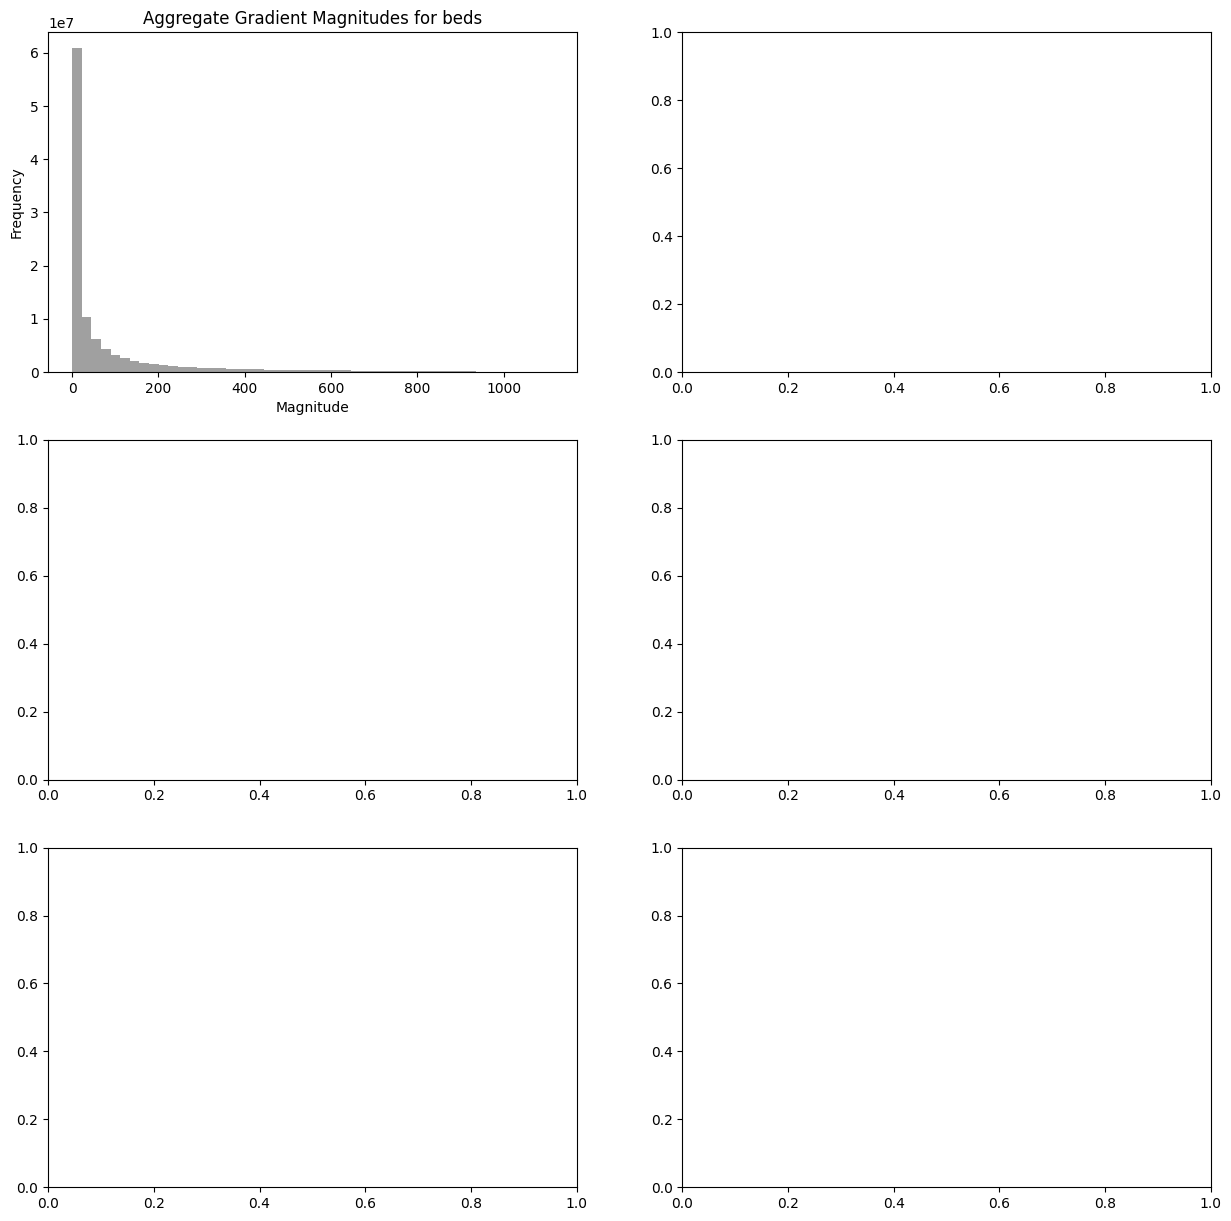

In [ ]:
styler.boxify(f"Gradient Magnitude Analysis")
analyze_gradient_magnitude_folders(image_dir)

#### Overall:
* **High Frequency of Low Magnitudes** (`0` to `380`): The histogram peaks sharply at the lowest **gradient magnitude** range, indicating that a large portion of the image areas are either uniform in color or exhibit smooth transitions. This suggests that all the furniture image in the dataset generally have large areas with minimal textural or color variations.

* **Rapid Decline in Frequency** (`0` to `380`): As with the other datasets, there is a rapid decrease in the frequency of higher **gradient magnitudes**. This suggests that stark contrasts or sharp edges are relatively rare in the images.
* **Scarcity of High Gradient Magnitudes** (`400` to `1000`): Very high **gradient magnitudes** are almost absent, which indicates that there are very few harsh transitions or high-contrast details in the images. This could be due to the shape and design of furniture, which often feature smooth contours and consistent materials.

Overall, the data suggests that images of furniture mostly feature smooth textures with only occasional sharp edges or high contrast areas.


#### Histogram of Orieted Gradients (HOG)

**Histogram of Oriented Gradients (HOG)** descriptors are well-suited for **object recognition** tasks like **pedestrian detection** and **image classification**. They analyze the distribution of **edge directions** within an image, focusing on the **magnitude** (strength) and **orientation** of gradients. This emphasis on **edge strength** and **direction** effectively captures features that describe both the **texture** and **shape** of objects, making **HOG descriptors** valuable for distinguishing between different **object classes**.


In [ ]:
from skimage.feature import hog
def analyze_hog_subfolders(image_dir):
    num_orientations = 9  # This must match the angle labels you want to use
    angle_step = 180 / num_orientations
    angle_labels = [int(i * angle_step) for i in range(num_orientations)]  # Generate labels for each bin

    for dataset, folder_path in image_dir.items():
        styler.boxify(f"Processing dataset: {dataset}")

        style_folders = [sub_folder for sub_folder in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, sub_folder))]

        cols = 4
        rows = (len(style_folders) + cols - 1) // cols

        plt.figure(figsize=(20, rows * 5))  # Adjust the overall figure size

        for index, style_folder in enumerate(style_folders, 1):
            style_folder_path = os.path.join(folder_path, style_folder)
            folder_hog_descriptors = []

            for image_file in os.listdir(style_folder_path):
                image_path = os.path.join(style_folder_path, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                if image is not None:
                    image = cv2.resize(image, (128, 128), interpolation=cv2.INTER_AREA)
                    fd = hog(image, orientations=num_orientations, pixels_per_cell=(8, 8),
                             cells_per_block=(2, 2), visualize=False, feature_vector=True)

                    fd_reshaped = fd.reshape(-1, num_orientations).sum(axis=0)
                    folder_hog_descriptors.append(fd_reshaped)
                else:
                    print(f"Failed to load image at {image_path}")

            if folder_hog_descriptors:
                combined_hog_descriptor = np.sum(folder_hog_descriptors, axis=0)

                plt.subplot(rows, cols, index)
                plt.bar(angle_labels, combined_hog_descriptor, alpha=0.75,width=angle_step * 0.8)
                plt.title(f'{style_folder}')
                plt.xlabel('Orientation Angles (degrees)')
                plt.ylabel('Frequency')
                plt.xticks(angle_labels)

        plt.tight_layout()
        plt.show()


In [ ]:
styler.boxify(f"HOG Analysis")

╭──────────────╮
│ HOG Analysis │
╰──────────────╯


╭──────────────────────────╮
│ Processing dataset: beds │
╰──────────────────────────╯


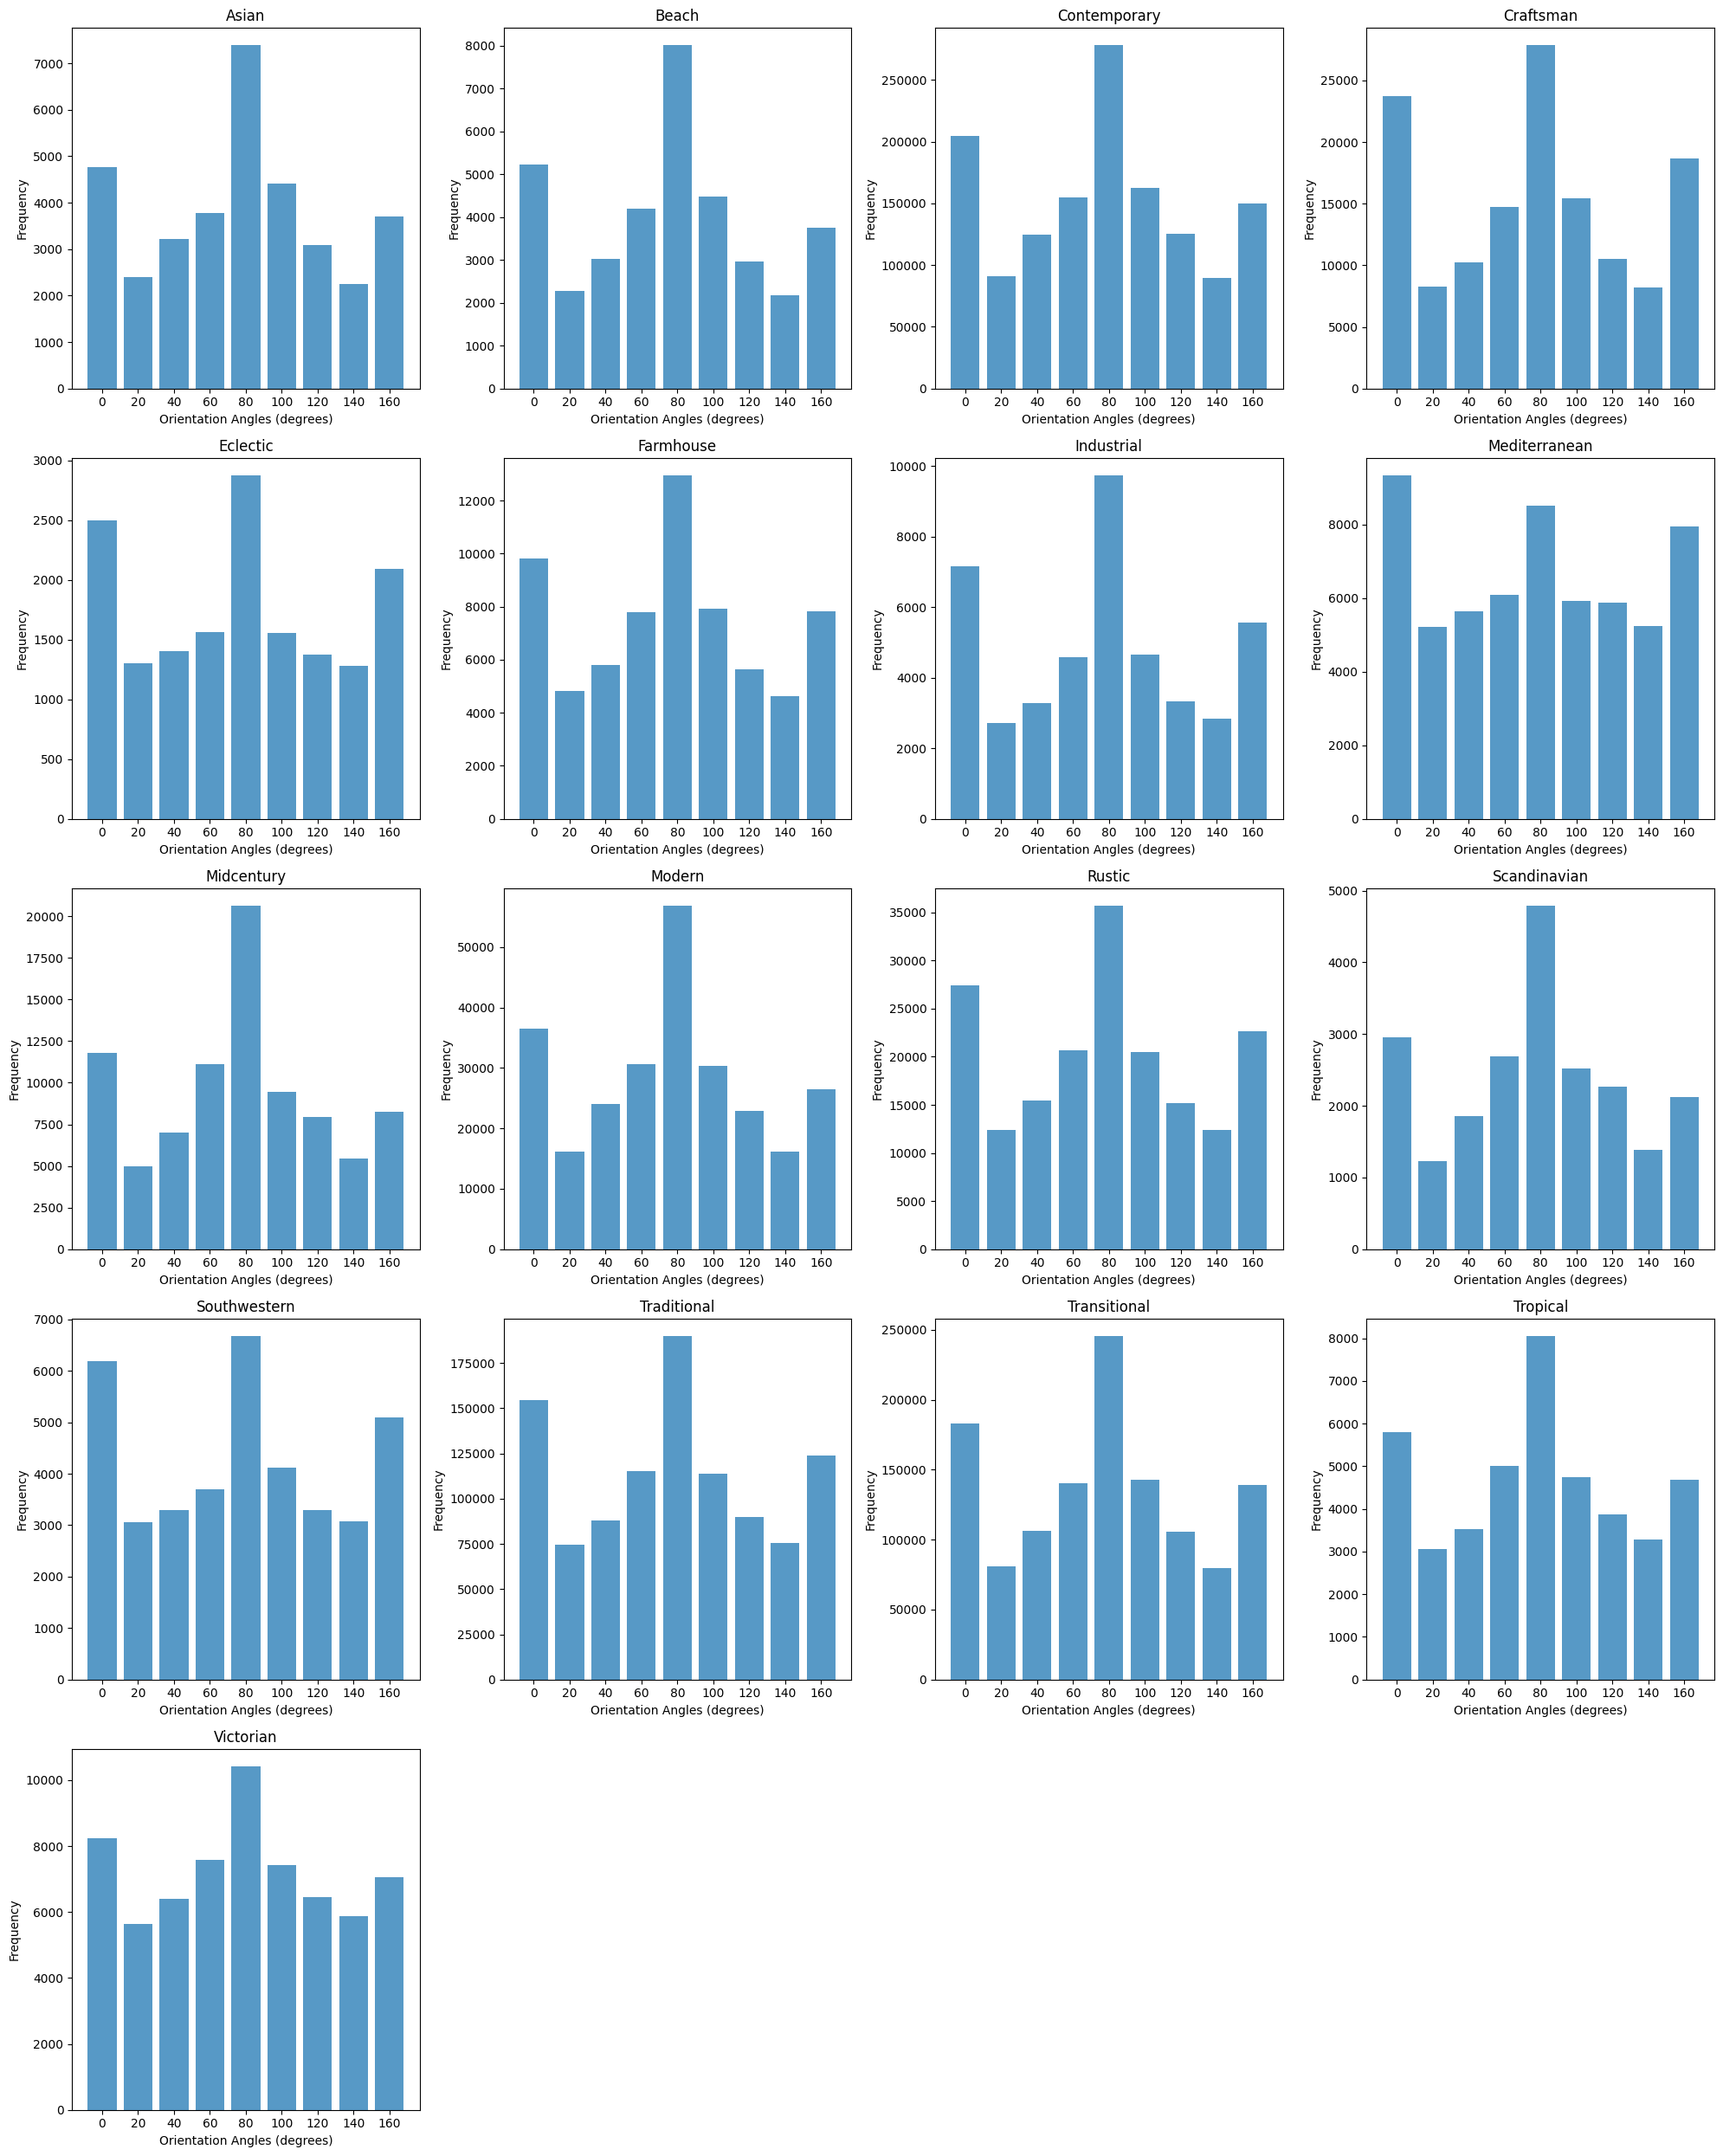

╭────────────────────────────╮
│ Processing dataset: chairs │
╰────────────────────────────╯


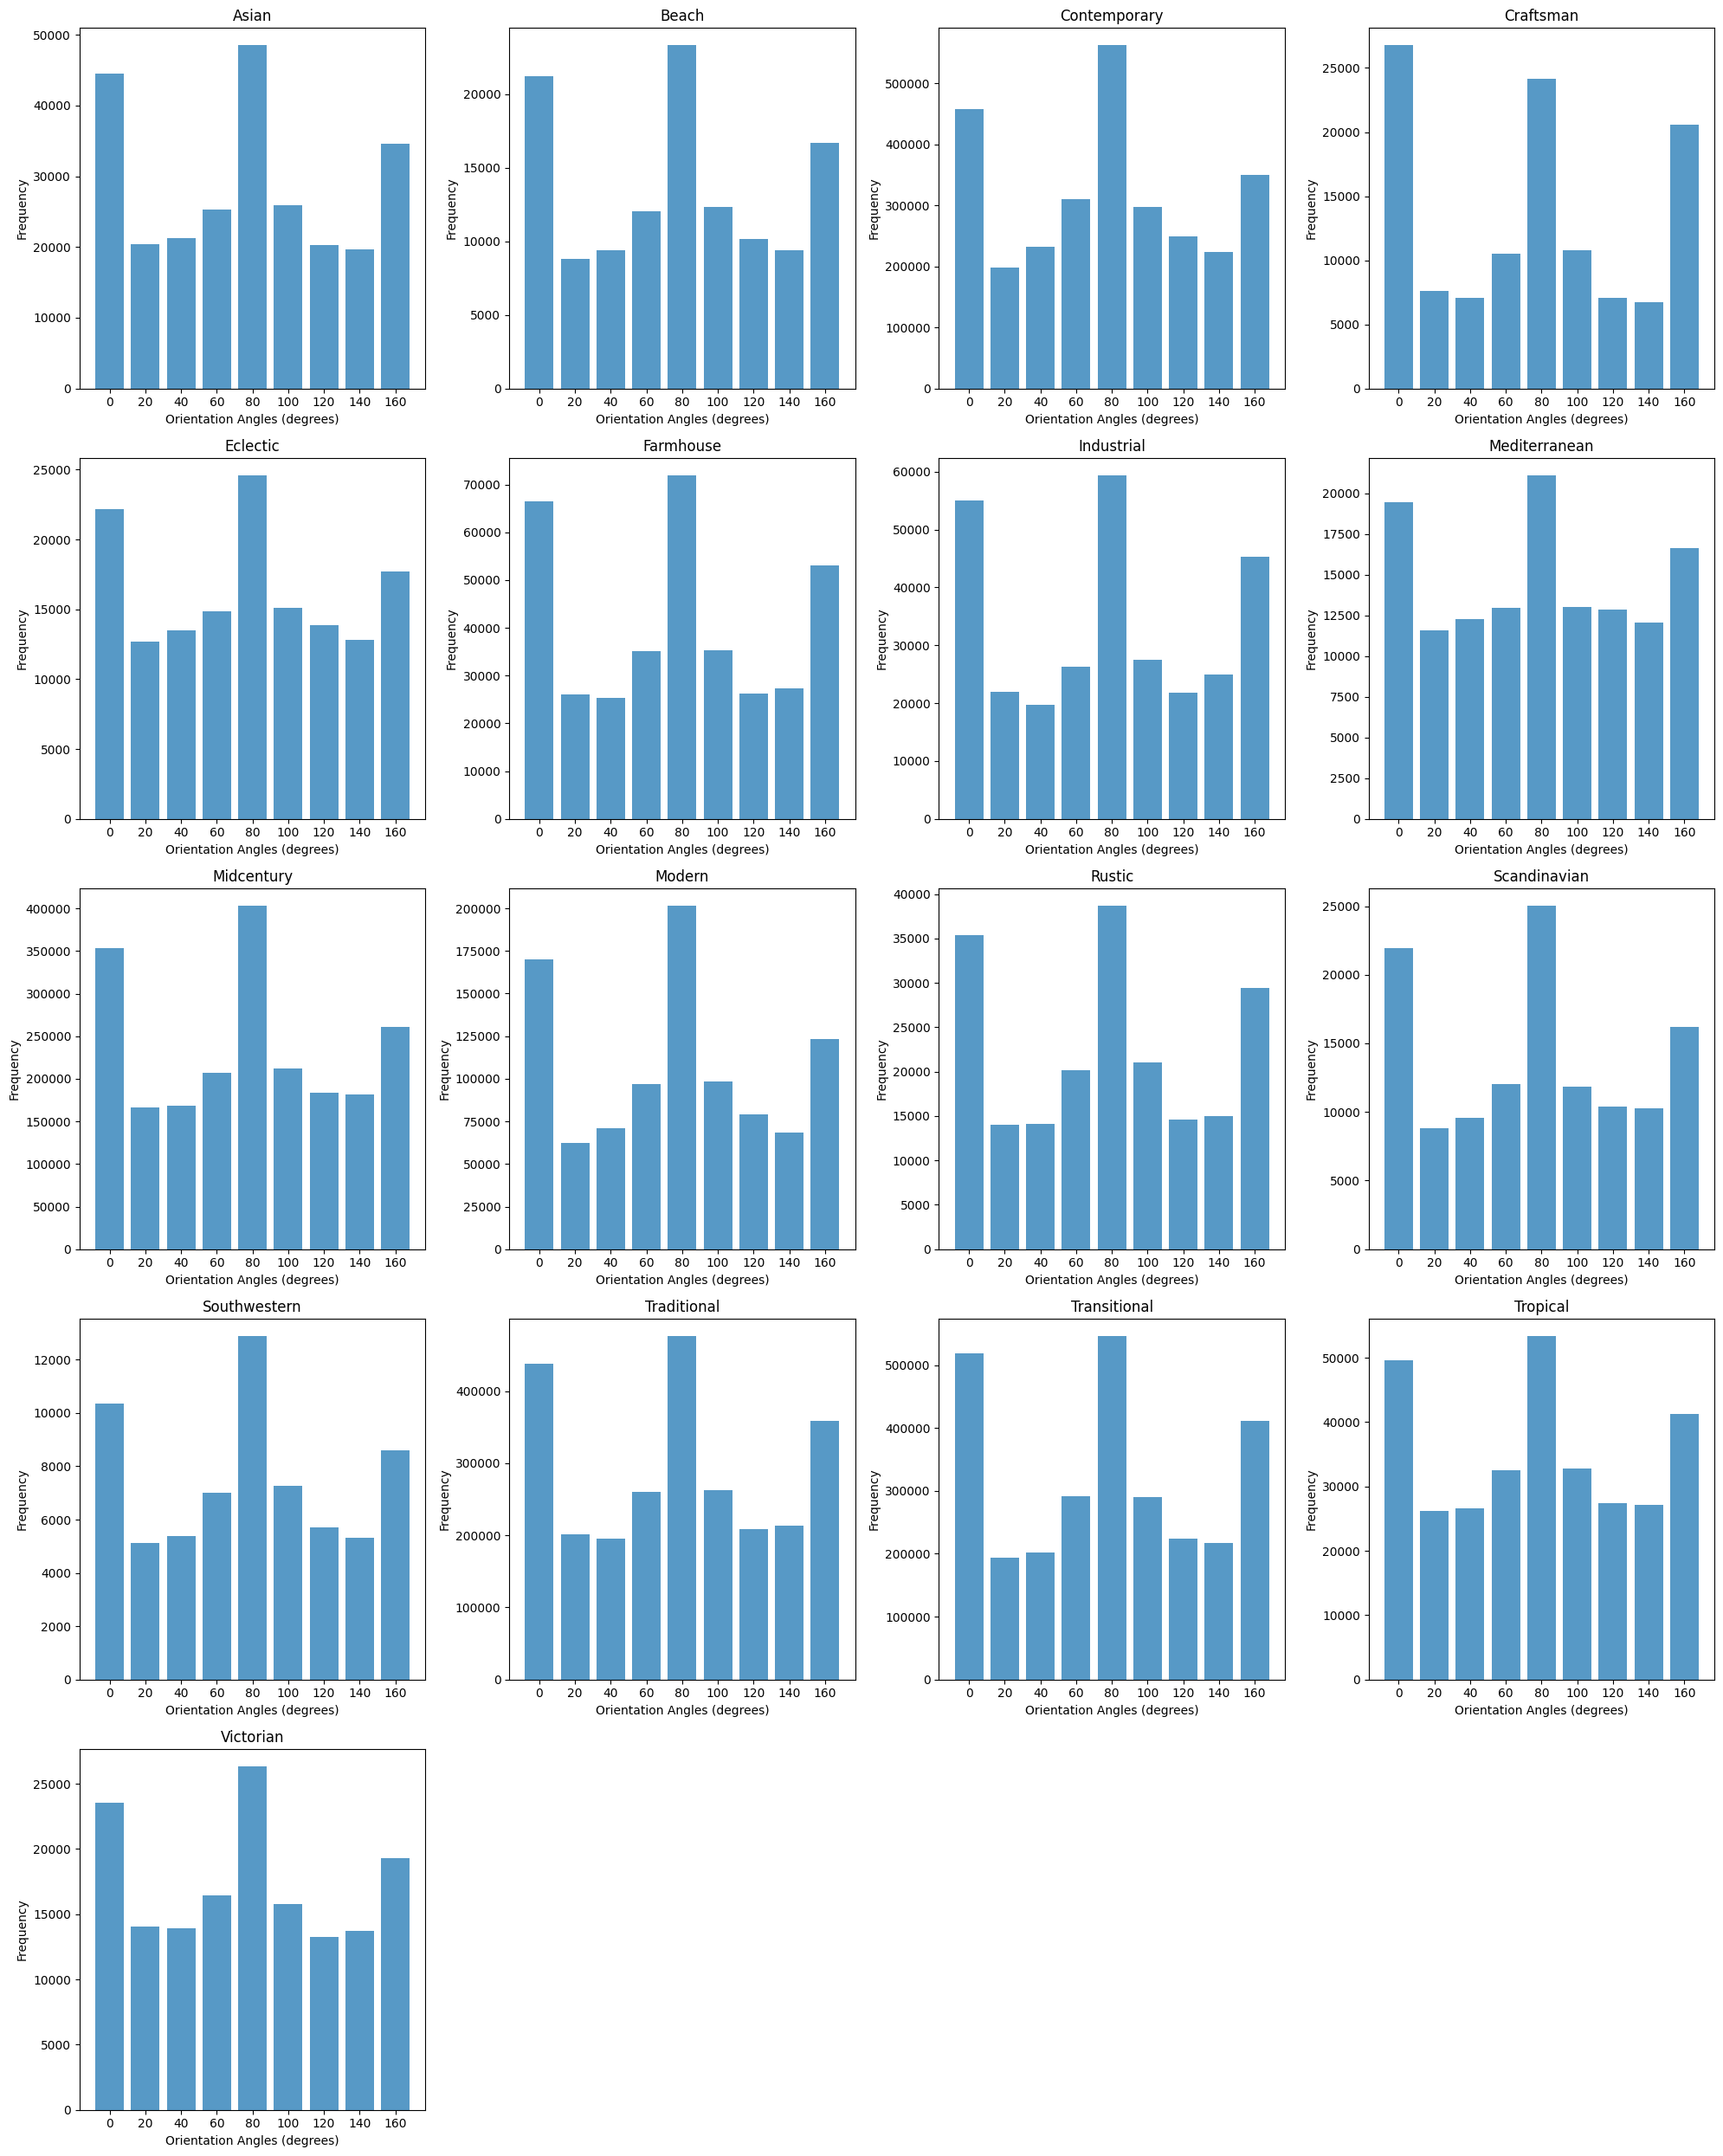

╭──────────────────────────────╮
│ Processing dataset: dressers │
╰──────────────────────────────╯


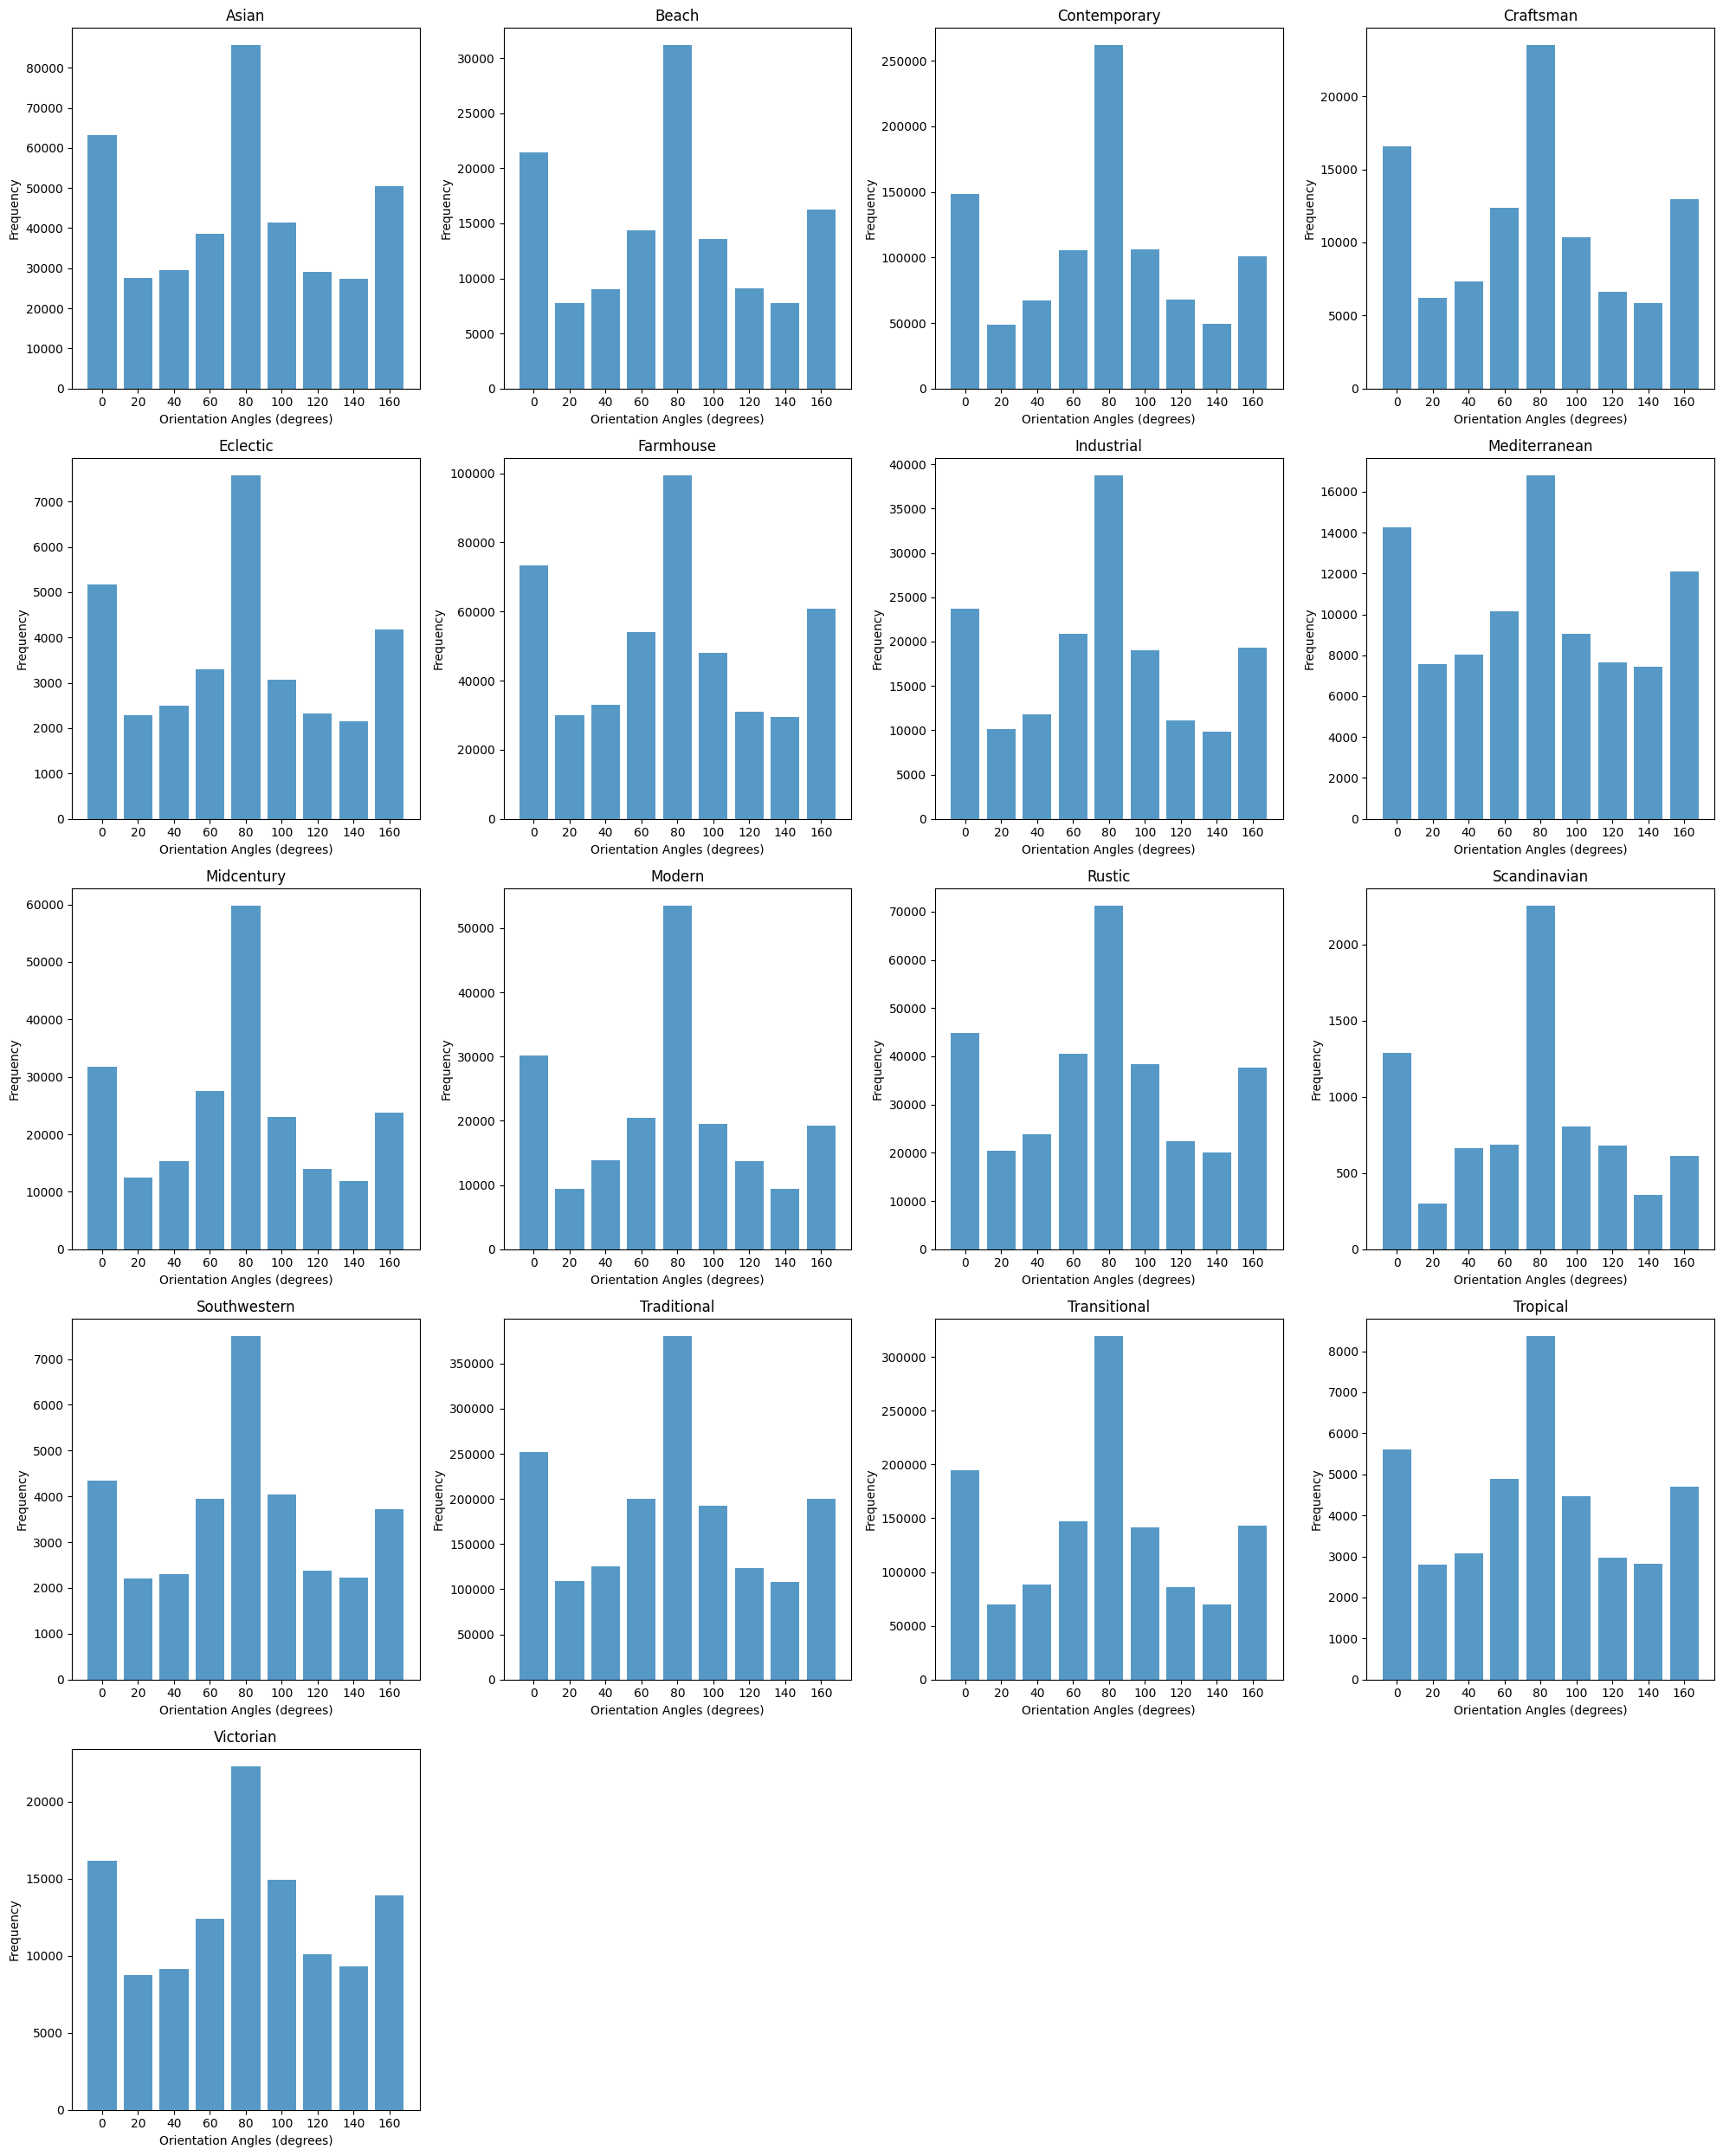

╭───────────────────────────╮
│ Processing dataset: lamps │
╰───────────────────────────╯
Failed to load image at c:\Users\huuqu\Academic\RMIT\Machine Learning\MLGroup\data\raw\Furniture_Data\Furniture_Data\lamps\Modern\11286modern-lighting.jpg


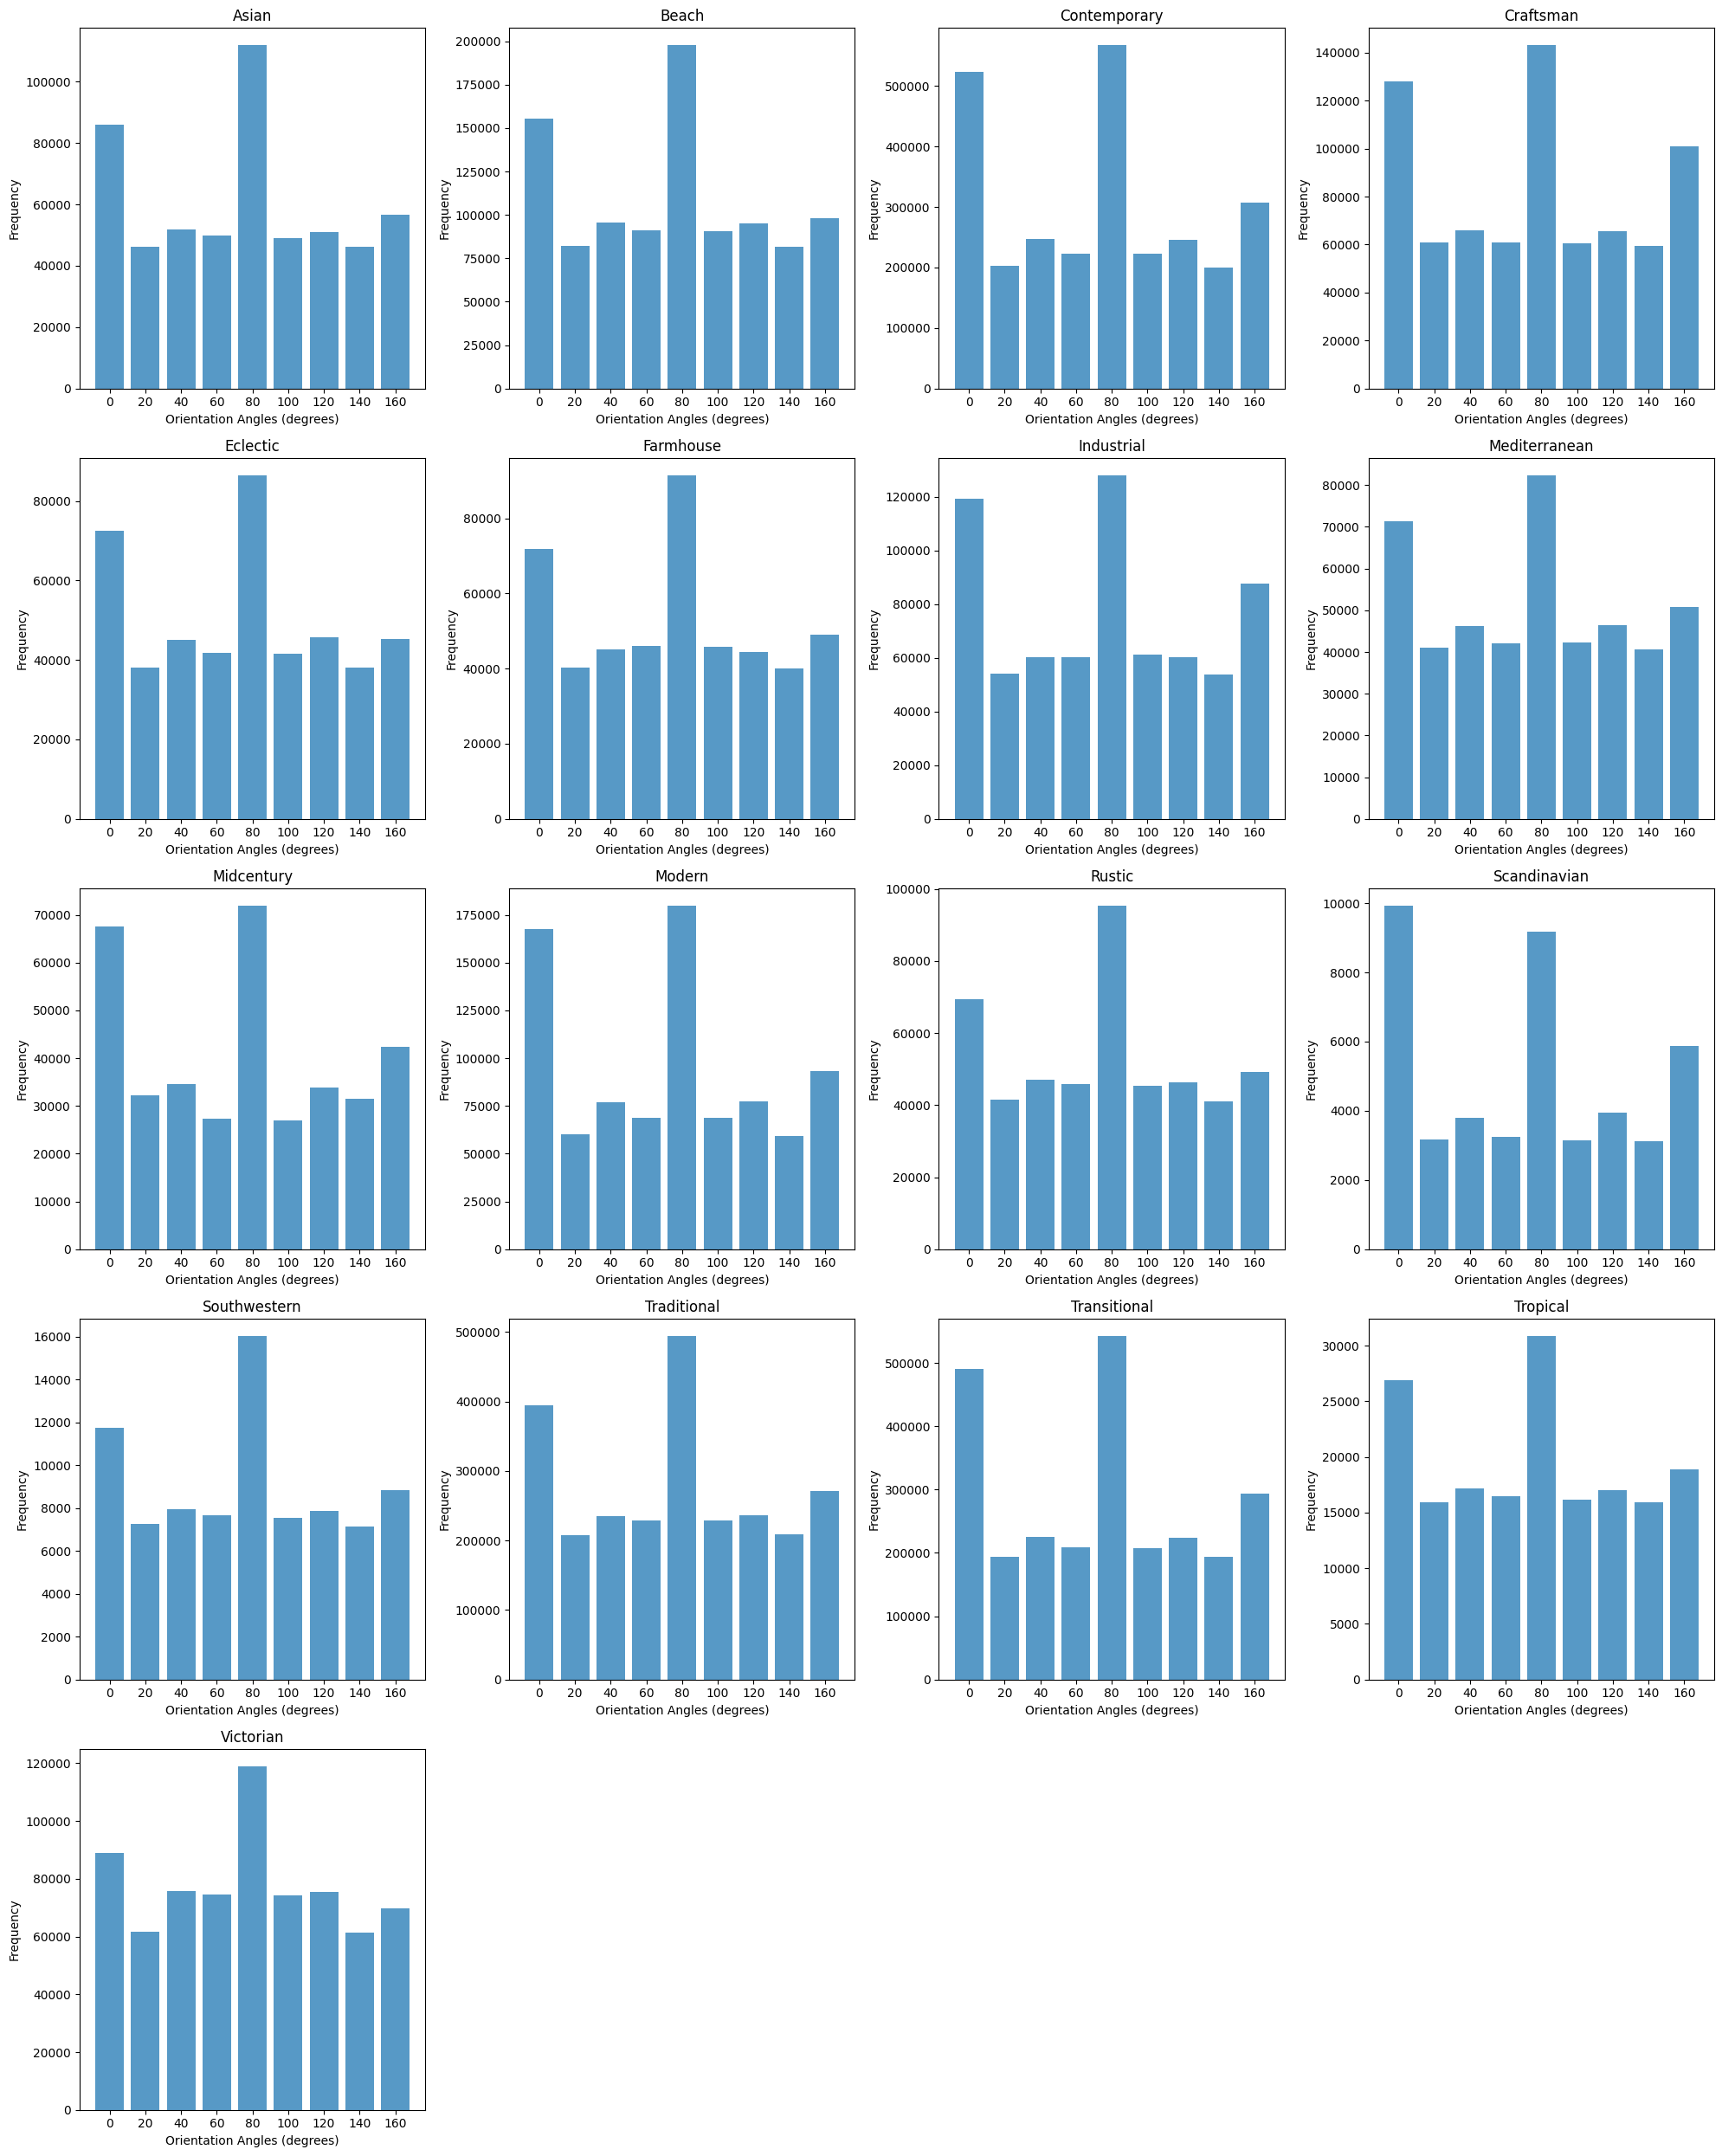

╭───────────────────────────╮
│ Processing dataset: sofas │
╰───────────────────────────╯


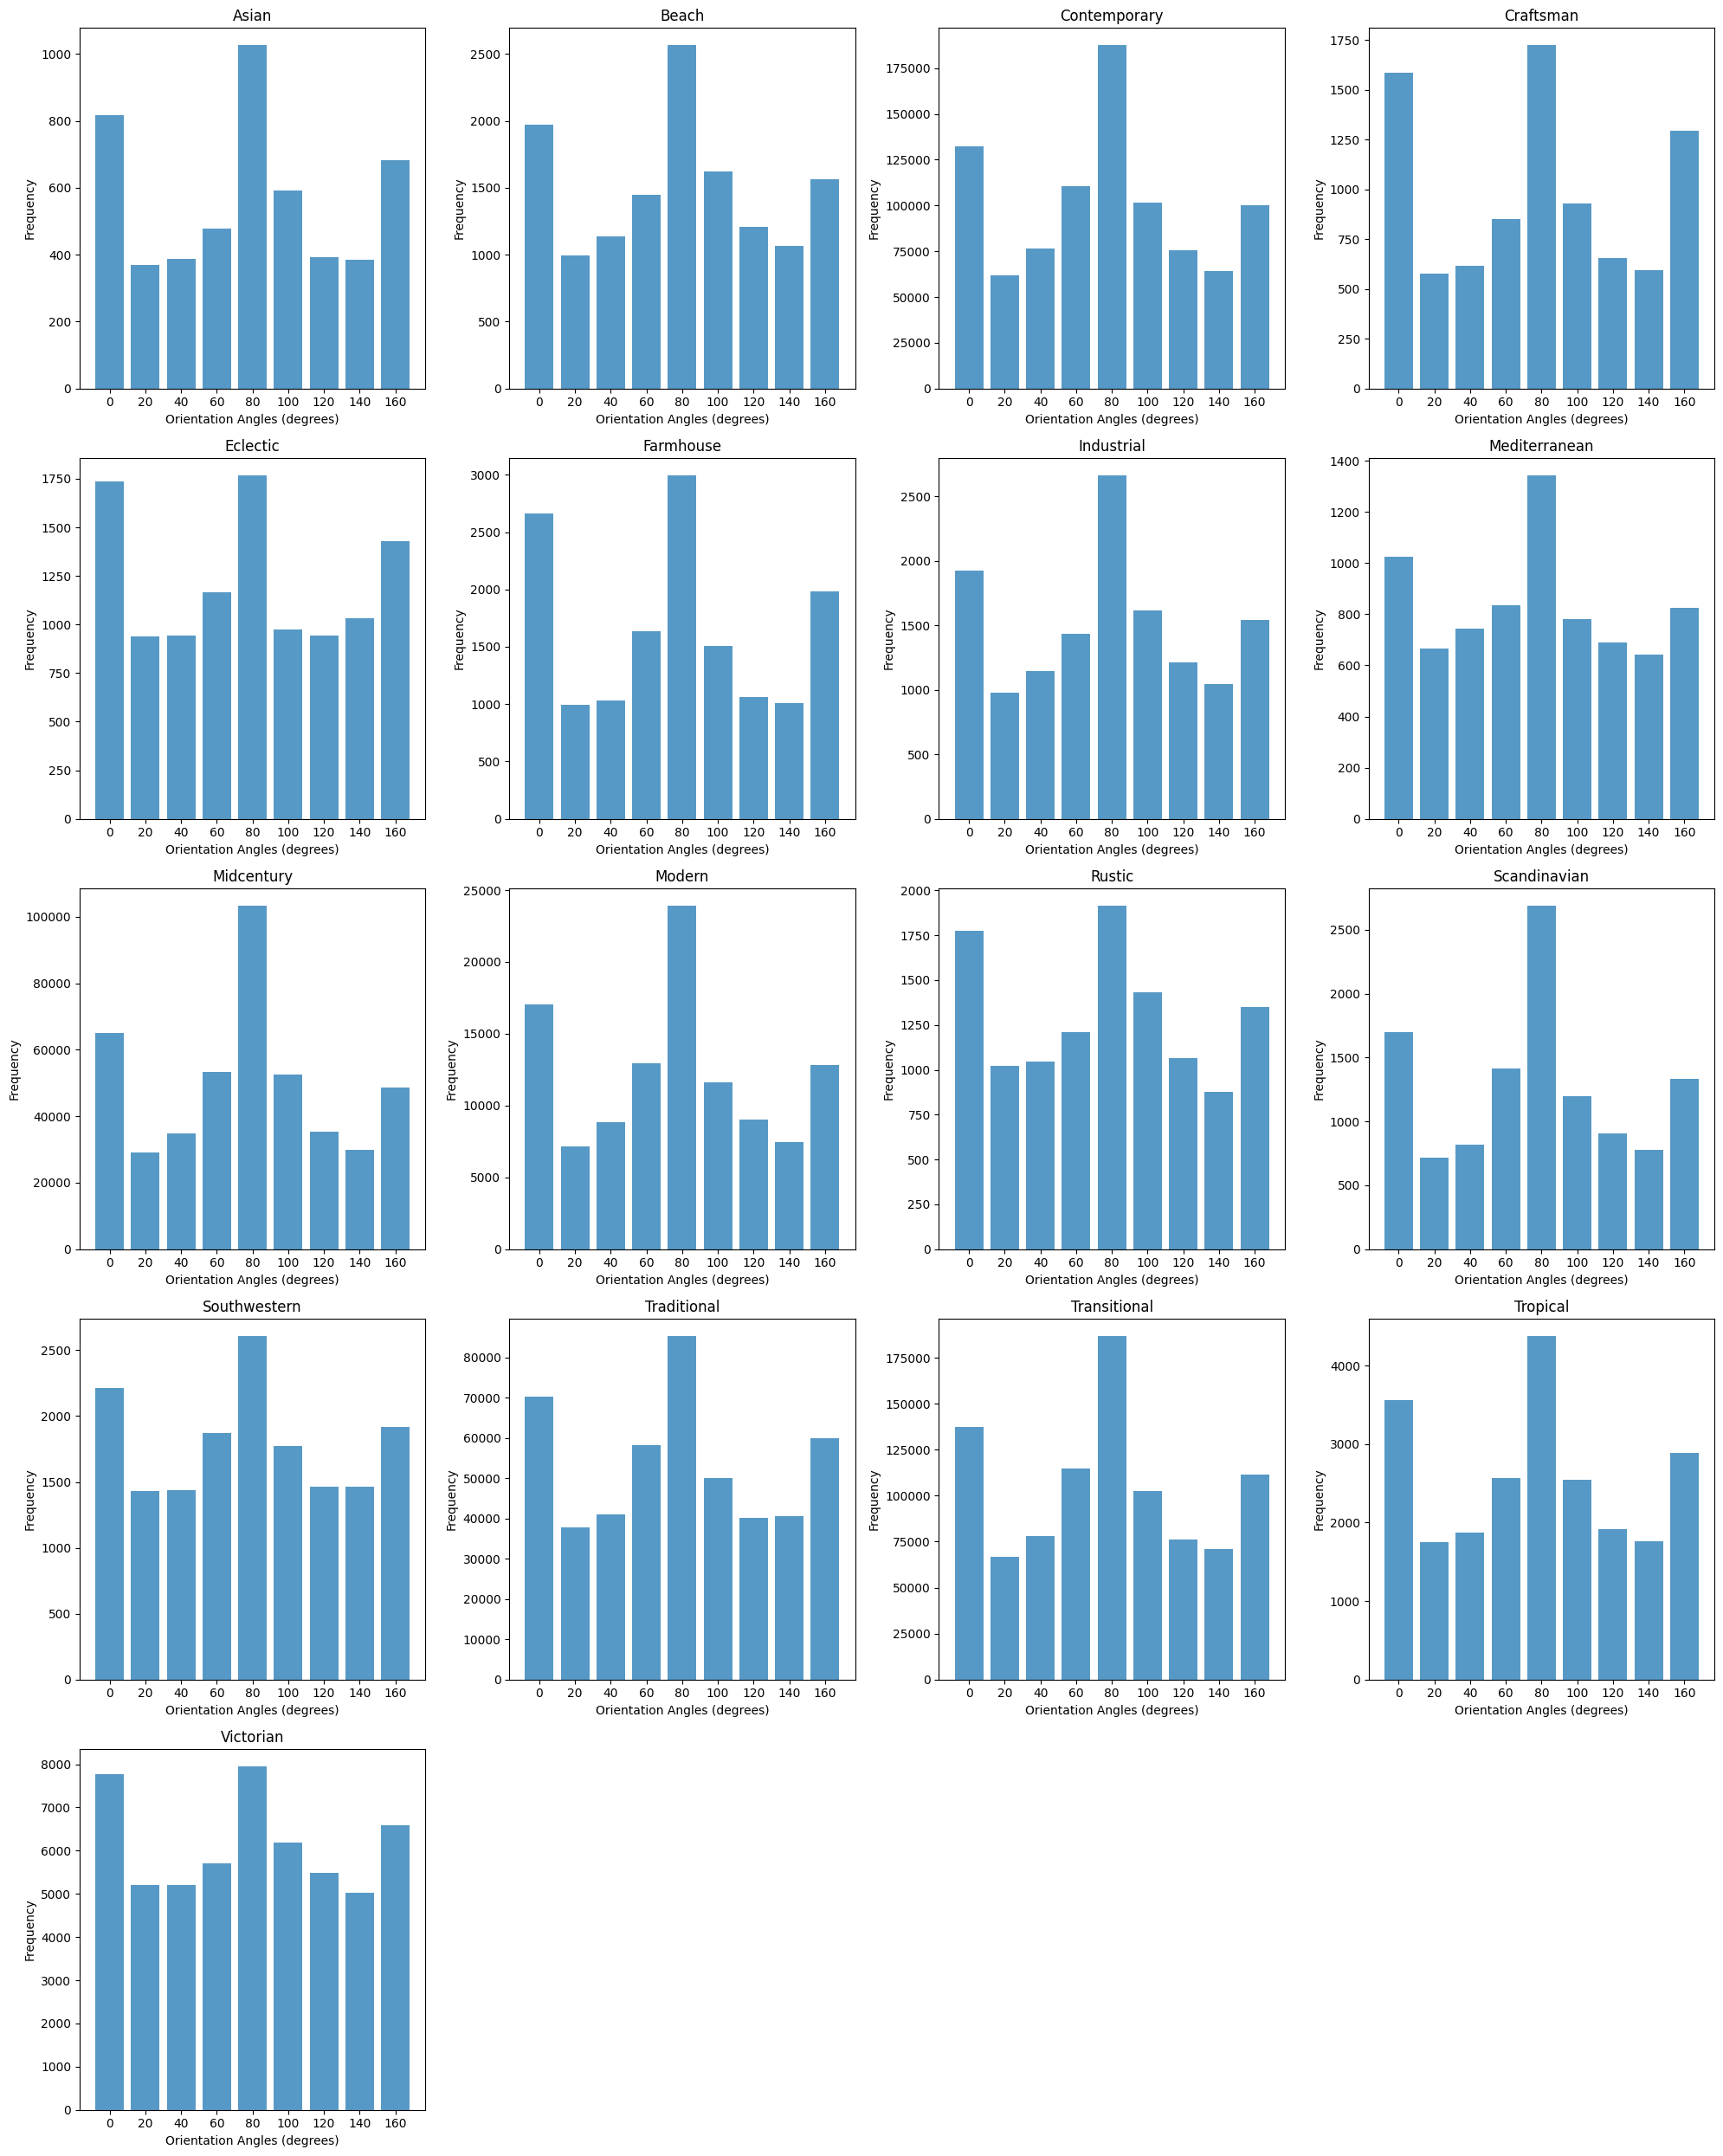

╭────────────────────────────╮
│ Processing dataset: tables │
╰────────────────────────────╯


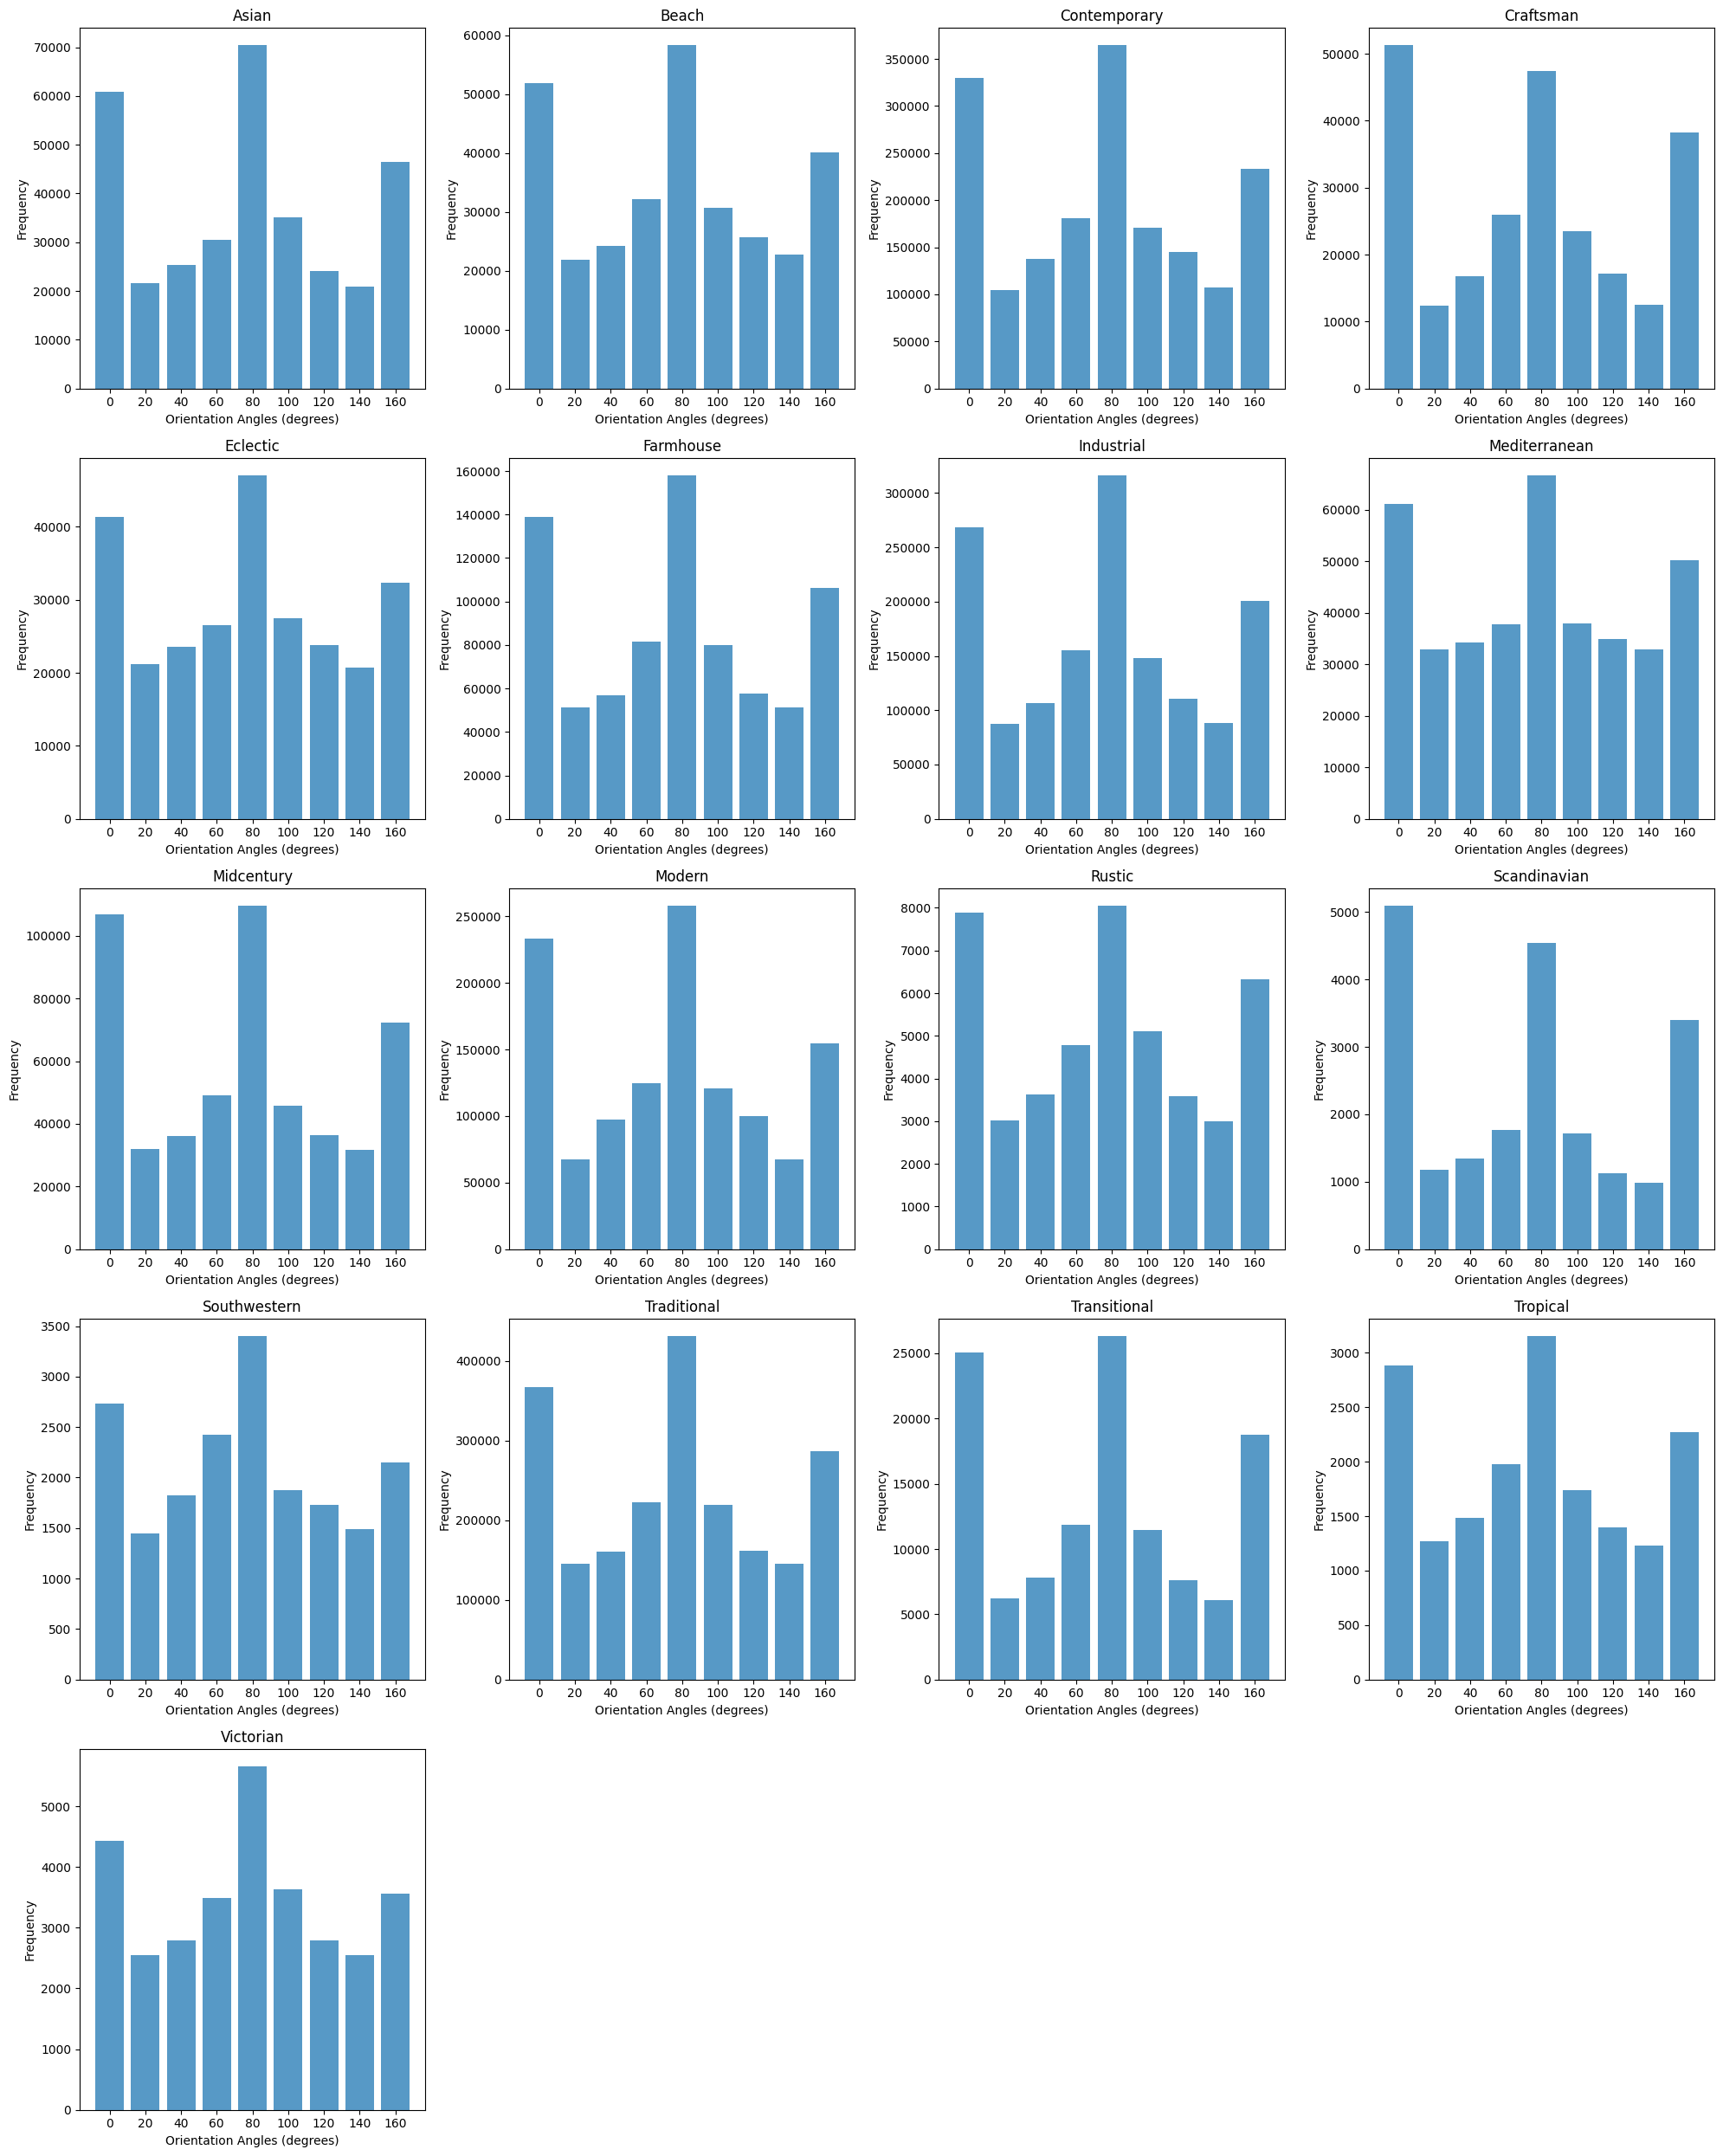

In [ ]:
analyze_hog_subfolders(image_dir)

#### For tables:
1. **High Distribution at `0°` and/or `160°`**:
   - **Styles**: Midcentury, Traditional, Contemporary, Mediterranean, Farmhouse, Modern

2. **High Distribution at `80°`**:
   - **Styles**: Asian, Contemporary, Modern

3. **Even Distribution Across Angles (`20` to `140`)**:
   - **Styles**: All the styles

#### For sofas:
1. **High Distribution Vertical and Near-Vertical Orientations (Peaks at `0°` and `160°`)**:
   - **Styles**: Transitional, Midcentury, Contemporary, Modern, Traditional

2. **High Distribution Mid-Angle Orientations (Peaks around `60°` to `100°`)**:
   - **Styles**: Traditional, Tropical, Contemporary, Modern, Victorian

3. **Even Distribution Across Angles (`20` to `140`)**:
   - **Styles**: All the styles

#### For lamps:
1. **High Distribution at `0°` and `160°`**:
   - **Styles**: Transitional, Traditional, Modern

2. **High Distribution at Mid-Angle `80°`**:
   - **Styles**: Contemporary, Traditional, Transitional, Beach

3. **Even Distribution**:
   - **Styles**: All the styles

#### For chairs:
1. **High Distribution Vertical Orientations (`0°` and `160°`)**:
   - **Styles**: Midcentury, Transitional, Traditional, Modern, Contemporary

2. **High Distribution at Mid-Angle (`80°`)**:
   - **Styles**: Midcentury, Transitional, Traditional, Modern, Contemporary

3. **Even Distribution Across Various Angles (`20°` to `140°`)**:
   - **Styles**: All the styles

#### For dressers:
1. **High Distribution Vertical Orientations (`0°` and `160°`)**:
   - **Styles**: Victorian, Transitional, Farmhouse

2. **High Distribution at Mid-Angle (`80°`)**:
   - **Styles**: Industrial, Asia, Midcentury, Transitional

3. **Even Distribution Across Various Angles (`20°` to `140°`)**:
   - **Styles**: All the styles

#### For beds:
1. **Dominant Vertical Orientations (`0°` and `160°`)**:
   - **Styles**: Mediterranean, Farmhouse, Rustic

2. **High Distribution at Mid-Angle (`80°`)**:
   - **Styles**: Midcentury, Rustic, Modern, Contemporary, Traditional

3. **Even Distribution Across Various Angles (`20°` to `140°`)**:
   - **Styles**: All the styles

**Overall**:
- The **Transitional**, **Traditional**, **Midcentury**, **Modern** styles have higher **HOG**.
- All styles exhibit a special prominence frequency at three specific angles: `0`, `80`, and `160` degrees. Notably, the `80`-degree angle demonstrates the highest prominence frequency among all measured angles.
- All styles are **evenly distributed** across the `20` to `140` degree angle range, with the exception of the `80` degree.
- The varied distribution of angles within an image indicates that each image has a **distinct** and **unique shape**.

